reference material：
Estimated posture from the video：https://www.bilibili.com/video/BV1Vu411e7M7/?spm_id_from=333.337.search-card.all.click&vd_source=d918f6b1b6c9d9b71a8e7890286fc628


In [2]:
import cv2
import mediapipe as mp
import time #计算fps值

1. Get the names of all the videos in the folder

In [3]:
# Iterate through all the files in the folder and take out their names
import os
def get_all_file_by_path(folder_path):
    file_list = []
    # Specify folder path
#     folder_path = './manic_phase'

    # Iterate through all the files in the folder
    for filename in os.listdir(folder_path):
        # Get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # Determine if it's a file
        if os.path.isfile(file_path):
            # Extract filename
    #         file_name = os.path.splitext(filename)[0]
            file_list.append(filename)
#     print(file_list)
    return file_list

# Iterate through all the files in the folder
def get_all_file_by_inner_path(folder_path):
    file_list = []
    for fpathe,dirs,fs in os.walk(folder_path):
        for f in fs:
            file_list.append(os.path.join(fpathe,f))
    return file_list

# Get all folders
def get_all_folder_by_path(folder_path):
    file_list = []
    # Specify the folder path
#     folder_path = './manic_phase'

    # Iterate through all the files in the folder
    for filename in os.listdir(folder_path):
        # Get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # Determine if it's a file
        if not os.path.isfile(file_path):
            # Extract filename
    #         file_name = os.path.splitext(filename)[0]
            file_list.append(filename)
#     print(file_list)
    return file_list

# Get all files in the secondary folder
def get_all_file_by_lv2_path(folder_path):
    folder_list =[]
    file_list = []
    for filename in os.listdir(folder_path):
        # Get the full path to the folder
        file_path = os.path.join(folder_path, filename)
        # Determine if it's a folder
        if not os.path.isfile(file_path):
            sec_files = get_all_file_by_path(file_path)
            for sec_name in sec_files:
                file_list.append(filename+'/'+sec_name)
#     print(file_list)
    return file_list

In [4]:
get_all_file_by_lv2_path('./emotion_dataset/manic_phase')

['angry/angry_1.mp4',
 'angry/angry_10.mp4',
 'angry/angry_100.mp4',
 'angry/angry_101.mp4',
 'angry/angry_102.mp4',
 'angry/angry_103.mp4',
 'angry/angry_104.mp4',
 'angry/angry_105.mp4',
 'angry/angry_106.mp4',
 'angry/angry_107.mp4',
 'angry/angry_108.mp4',
 'angry/angry_109.mp4',
 'angry/angry_11.mp4',
 'angry/angry_110.mp4',
 'angry/angry_111.mp4',
 'angry/angry_112.mp4',
 'angry/angry_113.mp4',
 'angry/angry_114.mp4',
 'angry/angry_115.mp4',
 'angry/angry_116.mp4',
 'angry/angry_117.mp4',
 'angry/angry_118.mp4',
 'angry/angry_119.mp4',
 'angry/angry_12.mp4',
 'angry/angry_120.mp4',
 'angry/angry_121.mp4',
 'angry/angry_122.mp4',
 'angry/angry_123.mp4',
 'angry/angry_124.mp4',
 'angry/angry_125.mp4',
 'angry/angry_126.mp4',
 'angry/angry_127.mp4',
 'angry/angry_128.mp4',
 'angry/angry_129.mp4',
 'angry/angry_13.mp4',
 'angry/angry_130.mp4',
 'angry/angry_131.mp4',
 'angry/angry_132.mp4',
 'angry/angry_133.mp4',
 'angry/angry_134.mp4',
 'angry/angry_135.mp4',
 'angry/angry_136.mp4'

In [5]:
import cv2
import mediapipe as mp

import time #计算fps值
import pandas as pd

In [6]:
#def get_pose_landmarks(emo_type, file_name)is the function used for wrapping. Wrapper script - used to get local video data and parse the data
def get_pose_landmarks(emo_type, file_name):
    # Two initialisations
    mpPose = mp.solutions.pose 
    pose = mpPose.Pose()
    # Initialise drawing tools
    mpDraw = mp.solutions.drawing_utils

    #". /"+variable name+variable name, means get the file path of the local video
    cap = cv2.VideoCapture('./'+emo_type+'/'+file_name) 
    # Variables needed to calculate pfs values, initialise them first with
    pTime = 0

    # Get the original size of the video frame
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(emo_type, file_name, 'Get the original size of the video frame',frame_width,frame_height)
    output_width = 640  # Set the new width
    output_height = int(frame_height * output_width / frame_width)  # Calculate new heights based on proportions
    output_video = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 25, (output_width, output_height))

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Resize the frame
        resized_frame = cv2.resize(frame, (output_width, output_height))

        # Here the adjusted frame is processed, e.g. displayed, saved or otherwise manipulated
        output_video.write(resized_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    output_video.release()

    video_capture = cv2.VideoCapture('output.mp4')
    landmarks_data = []
    frame_num = 0
    while True:
    #Read the image
        success, img = video_capture.read()
        if not success:
            break
        # Converted to RGB format because the Pose class intelligently handles RGB format and reads images in BGR format
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Process the image
        results = pose.process(imgRGB)
        #Remove the bone spots on your legs
        points_to_remove = [25,26,27,28,29,30,31,32]
        # print(results.pose_landmarks)
        # Detecting human words:
        if results.pose_landmarks:

            #Use mpDraw to carve and connect key points of the human body
            mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
            # If we want to perform a special operation on one of the 33 keypoints, we need to traverse the 33 keypoints first
            frame_num += 1
            
            for id, lm in enumerate(results.pose_landmarks.landmark):
            #The coordinates of the keypoints printed out are all in percentage form, we need to get the width and height of the video
                if id in points_to_remove:
                    continue
                h, w, c = img.shape
#                 print(id, lm)
                # Convert x times the width of the video and y times the height of the video to coordinate form
                cx, cy = int(lm.x * w), int(lm.y * h)
                # Add emotion type, video name, XYZ coordinate data to DataFrame
                landmarks_data.append({'TYPE': emo_type, 'FILE': file_name, 'FRAME':frame_num, 'ID': id, 'X': lm.x, 'Y': lm.y, 'Z': lm.z})
                # Use cv2's circle function to make keypoints special
                cv2.circle(img, (cx, cy), 5, (255, 0, 0), cv2.FILLED)
        
        
        # Calculate fps values
        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime
        cv2.putText(img, str(int(fps)), (70, 50), cv2.FONT_HERSHEY_PLAIN, 3,
                    (255, 0, 0), 3)
        cv2.imshow("Image", img)
        cv2.waitKey(1)
    video_capture.release()
    cv2.destroyAllWindows()# Automatically close the window after each video has been parsed
    return landmarks_data

Get data for manic_phase

In [6]:
# Write a loop that iterates through each file, calling the wrapped script above used for video data acquisition. For saving csv files
pose_list_manic_phase = []
file_list_manic_phase = get_all_file_by_lv2_path('./emotion_dataset/manic_phase')
for file_name in file_list_manic_phase:
    pose = get_pose_landmarks('emotion_dataset/manic_phase', file_name)
    pose_list_manic_phase.extend(pose)# Merge the two arrays, using extend
df_manic_phase = pd.DataFrame(pose_list_manic_phase)
df_manic_phase.to_csv('manic_phase_xyz_coordinates.csv', index=False)

emotion_dataset/manic_phase angry/angry_1.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_10.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_100.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_101.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_102.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_103.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_104.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_105.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_106.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_107.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_108.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_109.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_11.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_110.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angr

emotion_dataset/manic_phase angry/angry_27.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_28.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_29.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_3.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_30.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_31.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_32.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_33.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_34.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_35.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_36.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_37.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_38.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_39.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase angry/angry_4.mp4 获取视

emotion_dataset/manic_phase crazy/crazy_49.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_5.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_50.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_51.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_52.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_53.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_54.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_55.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_56.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_57.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_58.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_59.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_6.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_60.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase crazy/crazy_61.mp4 获取视

emotion_dataset/manic_phase happy/high_173.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_174.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_175.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_176.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_177.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_178.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_179.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_18.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_180.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_181.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_182.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_183.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/manic_phase happy/high_184.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_185.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_186.mp4 获取

emotion_dataset/manic_phase happy/high_77.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_78.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_79.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_8.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_80.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_81.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_82.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_83.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_84.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_85.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_86.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_87.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_88 .mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_89.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/manic_phase happy/high_9.mp4 获取视频帧的原始尺寸 1920 1

Getting the data for Depression_phase
Since running the loop will crash, split it into 2 types of emotions to run the loop separately, then merge them

#anxiety+despair

In [6]:
# Write a loop that iterates through each file, calling the wrapped script above used for video data acquisition. For saving csv files
pose_list_Depression_phase = []
file_list_Depression_phase = get_all_file_by_lv2_path('./emotion_dataset/Depression_phase')
for file_name in file_list_Depression_phase:
    pose = get_pose_landmarks('emotion_dataset/Depression_phase', file_name)
    pose_list_Depression_phase.extend(pose)# Merge the two arrays, using extend
df_Depression_phase = pd.DataFrame(pose_list_Depression_phase)
df_Depression_phase.to_csv('Depression_phase_xyz_coordinates.csv', index=False)

emotion_dataset/Depression_phase anxiety/anxiety_1.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_10.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_100.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_101.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_102.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_103.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_104.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_105.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_106.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_107.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_108.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_109.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_11.mp4 获取视频帧的原始尺寸 

emotion_dataset/Depression_phase anxiety/anxiety_7.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_70.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_71.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_72.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_73.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_74.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_75.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_76.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_77.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_78.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_79.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_8.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase anxiety/anxiety_80.mp4 获取视频帧的原始尺寸 1920 1080
e

emotion_dataset/Depression_phase despair/despair_165.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_166.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_167.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_168.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_17.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_170.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_171.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_172.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_173.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_179.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_18.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_180.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_181.mp4 获取视频帧的原始尺

emotion_dataset/Depression_phase despair/despair_47.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_48.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_49.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_5.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase despair/despair_50.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_51.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_52.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_53.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_54.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_55.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_56.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_57.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase despair/despair_58.mp4 获取视频帧的原始尺寸 1920 1080


#sad

In [6]:
# Write a loop that iterates through each file, calling the wrapped script above used for video data acquisition. For saving csv files
pose_list_Depression_phase_sad = []
file_list_Depression_phase_sad = get_all_file_by_lv2_path('./emotion_dataset/Depression_phase_sad')
for file_name in file_list_Depression_phase_sad:
    pose = get_pose_landmarks('emotion_dataset/Depression_phase_sad', file_name)
    pose_list_Depression_phase_sad.extend(pose)# Merge the two arrays, using extend
df_Depression_phase_sad = pd.DataFrame(pose_list_Depression_phase_sad)
df_Depression_phase_sad.to_csv('Depression_phase_sad_xyz_coordinates.csv', index=False)

emotion_dataset/Depression_phase_sad sad/cry_1.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_10.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_100.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_101.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_102.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_103.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_104.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_105.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_106.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_107.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_108.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_109.mp4 获取视频帧的原始尺寸 1080 1920
emotion_dataset/Depression_phase_sad sad/cry_11.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/c

emotion_dataset/Depression_phase_sad sad/cry_203.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_204.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_205.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_206.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_207.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_208.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_21.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_210.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_211.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_212.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_213.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_214.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_215.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sa

emotion_dataset/Depression_phase_sad sad/cry_304.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_305.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_306.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_307.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_308.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_309.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_31.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_310.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_311.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_312.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_313.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_314.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sad/cry_315.mp4 获取视频帧的原始尺寸 1920 1080
emotion_dataset/Depression_phase_sad sa

In [7]:
#Merge Depression_phase data using dataframe
df1 = pd.read_csv('Depression_phase_xyz_coordinates.csv')
df2 = pd.read_csv('Depression_phase_sad_xyz_coordinates.csv')
merged_df = pd.concat([df1, df2], ignore_index=True)  # Stack two DataFrames together.
merged_df.to_csv('Depression_phase_all_xyz_coordinates.csv', index=False)  # index=False means do not save indexed columns

3. Renaming and grouping of data using dataframe

In [21]:
def get_df_lstm(df_origin):
# Group by TYPE, FILE, FRAME and merge XYZ of each group into an array
    df_lstm = df_origin.groupby(['TYPE', 'FILE', 'FRAME'])['X', 'Y', 'Z'].apply(lambda x: x.values.flatten().tolist()).reset_index()
    df_lstm.drop(columns=['TYPE'], inplace=True)
    df_lstm.rename(columns={0: 'POSE'}, inplace=True)
    return df_lstm

可视化训练数据，可以见到输出结果里含有标签。Type代表，FILE代表文件名，Frame代表当前帧

In [22]:
import pandas as pd

# Read the action data CSV file of the hyperactive phase
df_manic_phase = pd.read_csv('data/manic_phase_xyz_coordinates.csv')
df_lstm_manic_phase = get_df_lstm(df_manic_phase)
df_lstm_manic_phase['LABEL']=1
df_lstm_manic_phase['FILE'] = df_lstm_manic_phase['FILE'].apply(lambda x: 'manic_' + str(x) )
print(df_lstm_manic_phase.shape[0])
print(df_lstm_manic_phase)

#Read CSV file of action data for depression period
df_Depression_phase = pd.read_csv('data/Depression_phase_all_xyz_coordinates.csv')
df_lstm_Depression_phase = get_df_lstm(df_Depression_phase)
df_lstm_Depression_phase['LABEL']=0
df_lstm_Depression_phase['FILE'] = df_lstm_Depression_phase['FILE'].apply(lambda x: 'depression_' + str(x) )
print(df_lstm_Depression_phase)

C:\Users\ginny\AppData\Local\Temp\ipykernel_30780\2481263422.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lstm = df_origin.groupby(['TYPE', 'FILE', 'FRAME'])['X', 'Y', 'Z'].apply(lambda x: x.values.flatten().tolist()).reset_index()


45135
                          FILE  FRAME  \
0      manic_angry/angry_1.mp4      1   
1      manic_angry/angry_1.mp4      2   
2      manic_angry/angry_1.mp4      3   
3      manic_angry/angry_1.mp4      4   
4      manic_angry/angry_1.mp4      5   
...                        ...    ...   
45130  manic_happy/high_99.mp4     86   
45131  manic_happy/high_99.mp4     87   
45132  manic_happy/high_99.mp4     88   
45133  manic_happy/high_99.mp4     89   
45134  manic_happy/high_99.mp4     90   

                                                    POSE  LABEL  
0      [0.6712705492973328, 0.2354803681373596, -0.44...      1  
1      [0.670484721660614, 0.2354438751935959, -0.450...      1  
2      [0.6686055660247803, 0.2352340519428253, -0.45...      1  
3      [0.6668257117271423, 0.2351486831903457, -0.44...      1  
4      [0.6650943160057068, 0.2347503304481506, -0.45...      1  
...                                                  ...    ...  
45130  [0.5850008130073547, 0.158889397

C:\Users\ginny\AppData\Local\Temp\ipykernel_30780\2481263422.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_lstm = df_origin.groupby(['TYPE', 'FILE', 'FRAME'])['X', 'Y', 'Z'].apply(lambda x: x.values.flatten().tolist()).reset_index()


                                   FILE  FRAME  \
0      depression_anxiety/anxiety_1.mp4      1   
1      depression_anxiety/anxiety_1.mp4      2   
2      depression_anxiety/anxiety_1.mp4      3   
3      depression_anxiety/anxiety_1.mp4      4   
4      depression_anxiety/anxiety_1.mp4      5   
...                                 ...    ...   
62925         depression_sad/cry_99.mp4     86   
62926         depression_sad/cry_99.mp4     87   
62927         depression_sad/cry_99.mp4     88   
62928         depression_sad/cry_99.mp4     89   
62929         depression_sad/cry_99.mp4     90   

                                                    POSE  LABEL  
0      [0.5519856810569763, 0.3506132960319519, -0.35...      0  
1      [0.5530905723571777, 0.3474056422710418, -0.37...      0  
2      [0.5539628267288208, 0.3418100476264953, -0.38...      0  
3      [0.5659641027450562, 0.3321160078048706, -0.41...      0  
4      [0.5708790421485901, 0.3186957240104675, -0.41...      0  
...

Find the coordinate data of each point in each frame of the first video.
Find the POSE data of each line of the video named 'manic_angry/angry_1.mp4'.

In [23]:
poses_manic_phase = df_lstm_manic_phase.loc[df_lstm_manic_phase['FILE'] == 'manic_angry/angry_1.mp4', 'POSE'].apply(lambda x: x).tolist()
print(poses_manic_phase[0])# Print the pose data of the first frame of the first video

[0.6712705492973328, 0.2354803681373596, -0.4464830458164215, 0.6918896436691284, 0.183196559548378, -0.4306310713291168, 0.7037703394889832, 0.1848581880331039, -0.4307834506034851, 0.7132774591445923, 0.1865202188491821, -0.4307096600532532, 0.6550680994987488, 0.178206205368042, -0.4113690853118896, 0.6445372104644775, 0.1770250797271728, -0.4111872315406799, 0.6350618600845337, 0.1762076616287231, -0.411561906337738, 0.7293753623962402, 0.2145166397094726, -0.2485297620296478, 0.6265086531639099, 0.1992622017860412, -0.1509742438793182, 0.6939765810966492, 0.2973769903182983, -0.3763150572776794, 0.6496881246566772, 0.2895122170448303, -0.3496086299419403, 0.8086273074150085, 0.4814441204071045, -0.1999179720878601, 0.573512613773346, 0.4738124012947082, 0.0288954973220825, 0.7889984846115112, 0.8115739822387695, -0.4615474641323089, 0.5066018104553223, 0.7850210666656494, -0.0735023096203804, 0.7334925532341003, 0.4669396579265594, -0.8179000020027161, 0.3675921857357025, 0.858984

In [24]:
poses_Depression_phase = df_lstm_Depression_phase.loc[df_lstm_Depression_phase['FILE'] == 'depression_anxiety/anxiety_1.mp4', 'POSE'].apply(lambda x: x).tolist()
print(poses_Depression_phase[0])


[0.5519856810569763, 0.3506132960319519, -0.3589707612991333, 0.5737178325653076, 0.300419807434082, -0.3790985345840454, 0.5865843296051025, 0.3010013103485107, -0.3792829215526581, 0.6022005081176758, 0.3018048405647278, -0.3796815574169159, 0.5515792369842529, 0.2939486503601074, -0.3322159051895141, 0.5462695956230164, 0.2900891900062561, -0.3318752944469452, 0.541358470916748, 0.2861377596855163, -0.3321404457092285, 0.6438071727752686, 0.3115556836128235, -0.3073605000972748, 0.5529061555862427, 0.2882314324378967, -0.0795397534966468, 0.5725783109664917, 0.4080835878849029, -0.3235308825969696, 0.5457181930541992, 0.3923977017402649, -0.2603543996810913, 0.7568397521972656, 0.4923112094402313, -0.2721112072467804, 0.4886902868747711, 0.4389495551586151, 0.1350366324186325, 0.8861441612243652, 0.8550719618797302, -0.3342786729335785, 0.3418230712413788, 0.3172662854194641, 0.3006918430328369, 0.6966025829315186, 0.8935345411300659, -0.1921720057725906, 0.533873975276947, 0.258593

Classifier training using LSTM

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [26]:
data = pd.concat([df_lstm_manic_phase, df_lstm_Depression_phase]).reset_index()

data = data.drop(data[(data['FILE'] == 'manic_angry/angry_1.mp4') | (data['FILE'] == 'depression_anxiety/anxiety_1.mp4')].index).reset_index()

# Data pre-processing
max_frames = data['FRAME'].max()
num_features = len(data['POSE'][0])  # of features in the attitude data
print(max_frames, num_features)

# Grouping and counting by FILE columns
count = data.groupby('FILE').size().reset_index(name='COUNT')
print(count)

X = []
y = []

for file in data['FILE'].unique():
    file_data = data[data['FILE'] == file]
#     print(file,file_data['FRAME'].max())
    poses = np.array(file_data['POSE'].tolist())
#     print(poses)
    label = file_data['LABEL'].iloc[0]
    
    # Fill pose data to max_frames length
    padded_poses = np.zeros((max_frames, num_features))
    padded_poses[:poses.shape[0], :poses.shape[1]] = poses
    
    X.append(padded_poses)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(len(X))
# print(X[0][111])
# print(y[0],y[21])



90 75
                                    FILE  COUNT
0      depression_anxiety/anxiety_10.mp4     90
1     depression_anxiety/anxiety_100.mp4     90
2     depression_anxiety/anxiety_101.mp4     90
3     depression_anxiety/anxiety_102.mp4     90
4     depression_anxiety/anxiety_103.mp4     90
...                                  ...    ...
1208             manic_happy/high_95.mp4     90
1209             manic_happy/high_96.mp4     90
1210             manic_happy/high_97.mp4     90
1211             manic_happy/high_98.mp4     90
1212             manic_happy/high_99.mp4     90

[1213 rows x 2 columns]
1213


In [27]:
# Divide the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(max_frames, num_features), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training models
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('lstm_emotion_detection.h5')

Epoch 1/100
23/23 [==============================] - 7s 156ms/step - loss: 0.6927 - accuracy: 0.5585 - val_loss: 0.6703 - val_accuracy: 0.5741
Epoch 2/100
23/23 [==============================] - 3s 122ms/step - loss: 0.6706 - accuracy: 0.5860 - val_loss: 0.6328 - val_accuracy: 0.6091
Epoch 3/100
23/23 [==============================] - 3s 114ms/step - loss: 0.6615 - accuracy: 0.6107 - val_loss: 0.6357 - val_accuracy: 0.6440
Epoch 4/100
23/23 [==============================] - 3s 133ms/step - loss: 0.6655 - accuracy: 0.6135 - val_loss: 0.6328 - val_accuracy: 0.6893
Epoch 5/100
23/23 [==============================] - 4s 154ms/step - loss: 0.6270 - accuracy: 0.6272 - val_loss: 0.7489 - val_accuracy: 0.6132
Epoch 6/100
23/23 [==============================] - 3s 135ms/step - loss: 0.6588 - accuracy: 0.6396 - val_loss: 0.5958 - val_accuracy: 0.7058
Epoch 7/100
23/23 [==============================] - 3s 150ms/step - loss: 0.6026 - accuracy: 0.6809 - val_loss: 0.5648 - val_accuracy: 0.6996

Epoch 58/100
23/23 [==============================] - 3s 148ms/step - loss: 0.2754 - accuracy: 0.8872 - val_loss: 0.4200 - val_accuracy: 0.8128
Epoch 59/100
23/23 [==============================] - 3s 147ms/step - loss: 0.3017 - accuracy: 0.8652 - val_loss: 0.4671 - val_accuracy: 0.8251
Epoch 60/100
23/23 [==============================] - 3s 149ms/step - loss: 0.2517 - accuracy: 0.8996 - val_loss: 0.5104 - val_accuracy: 0.8169
Epoch 61/100
23/23 [==============================] - 3s 129ms/step - loss: 0.2825 - accuracy: 0.8652 - val_loss: 0.4507 - val_accuracy: 0.8251
Epoch 62/100
23/23 [==============================] - 3s 119ms/step - loss: 0.2526 - accuracy: 0.8927 - val_loss: 0.4762 - val_accuracy: 0.8436
Epoch 63/100
23/23 [==============================] - 3s 150ms/step - loss: 0.3326 - accuracy: 0.8748 - val_loss: 0.4910 - val_accuracy: 0.8004
Epoch 64/100
23/23 [==============================] - 4s 156ms/step - loss: 0.3108 - accuracy: 0.8803 - val_loss: 0.4208 - val_accuracy:

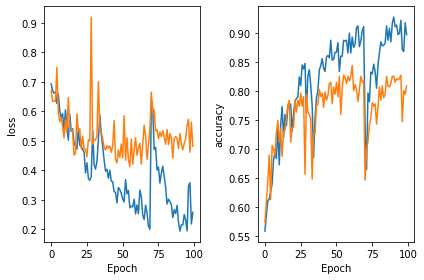

In [23]:
#Visualisation
#Import libraries needed for visualisation
import matplotlib.pyplot as plt

# Plot our loss
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# Plot our accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.tight_layout()
plt.show()

Test the trained classification model, the video source used for testing is the original video in the dataset
Testing the classification results of the model (using the first video for each emotion as an example, using the model to classify the emotions of the characters in the video)

In [17]:
# Use the trained model to classify the characters in the video as belonging to the hyperactive or depressive phase
def predict_crying(model, pose_data):
    # Pre-processing of input data
    padded_poses = np.zeros((1, max_frames, num_features))
    padded_poses[0, :pose_data.shape[0], :pose_data.shape[1]] = pose_data
    
    # Predictions
    prediction = model.predict(padded_poses)
    print(prediction, padded_poses)
    return 1 if prediction >= 0.5 else 0

# Classification, what stage are the people in the new video at
new_video_pose_data = np.array(poses_manic_phase)  # Input the pose data for the new video here
is_crying = predict_crying(model, new_video_pose_data)
print("is in manic phase" if is_crying else "is in depression phase ")

new_video_pose_data = np.array(poses_Depression_phase)  # Input the pose data for the new video here
is_crying = predict_crying(model, new_video_pose_data)
print("is in manic phase" if is_crying else "is in depression phase")

1/1 [==============================] - 1s 742ms/step
[[0.87012154]] [[[ 0.67127055  0.23548037 -0.44648305 ...  0.59360933  1.00743389
    0.07599356]
  [ 0.67048472  0.23544388 -0.45096889 ...  0.58845419  1.00305367
    0.05113649]
  [ 0.66860557  0.23523405 -0.45089865 ...  0.58516967  1.00199056
    0.03149968]
  ...
  [ 0.65575236  0.25420809 -0.44159046 ...  0.53208405  1.0858357
    0.01446545]
  [ 0.65376115  0.25425678 -0.44139606 ...  0.52954423  1.02672243
    0.00680839]
  [ 0.65233117  0.2543588  -0.43549114 ...  0.52995574  1.02772748
    0.00556412]]]
is in manic phase
1/1 [==============================] - 0s 28ms/step
[[0.34319657]] [[[ 0.55198568  0.3506133  -0.35897076 ...  0.52044612  1.11504042
    0.12265847]
  [ 0.55309057  0.34740564 -0.37189311 ...  0.52046096  1.14219773
    0.12200145]
  [ 0.55396283  0.34181005 -0.38064659 ...  0.51922685  1.15604877
    0.11619465]
  ...
  [ 0.57496411  0.33096689 -0.46650243 ...  0.51159728  1.24580514
    0.0927382 ]
  [ 

测试正确率

In [18]:
# Remove the unique value of the FILE column in the df_lstm_manic_phase DataFrame (de-emphasis) for each file in the manic_phase
unique_files = df_lstm_manic_phase['FILE'].unique()
# Iterate through the list of filenames and export the pose data for each file

correct_num = 0 #A counter that records the number of videos correctly predicted by the model to be in the "manic" phase.
# Iterate through the list of filenames and export the pose data for each file.
for file_name in unique_files:
    poses = df_lstm_manic_phase.loc[df_lstm_manic_phase['FILE'] == file_name, 'POSE'].apply(lambda x: x).tolist()
    new_video_pose_data = np.array(poses)  # Input the pose data for the new video here
    is_manic = predict_crying(model, new_video_pose_data)
    if is_manic :
        correct_num+=1
    print("is in manic phase" if is_manic else "is in depression phase")
print(correct_num,len(unique_files),correct_num / len(unique_files))

1/1 [==============================] - 0s 29ms/step
[[0.87012154]] [[[ 0.67127055  0.23548037 -0.44648305 ...  0.59360933  1.00743389
    0.07599356]
  [ 0.67048472  0.23544388 -0.45096889 ...  0.58845419  1.00305367
    0.05113649]
  [ 0.66860557  0.23523405 -0.45089865 ...  0.58516967  1.00199056
    0.03149968]
  ...
  [ 0.65575236  0.25420809 -0.44159046 ...  0.53208405  1.0858357
    0.01446545]
  [ 0.65376115  0.25425678 -0.44139606 ...  0.52954423  1.02672243
    0.00680839]
  [ 0.65233117  0.2543588  -0.43549114 ...  0.52995574  1.02772748
    0.00556412]]]
is in manic phase
1/1 [==============================] - 0s 28ms/step
[[0.9963027]] [[[ 0.53564996  0.31296539 -0.66141027 ...  0.60865653  0.96366364
    0.11875719]
  [ 0.5352512   0.30774453 -0.64009255 ...  0.59854764  0.99035102
    0.11893755]
  [ 0.53513914  0.29564744 -0.52460206 ...  0.59675699  1.01917374
    0.12346015]
  ...
  [ 0.5425086   0.37872103 -0.29618806 ...  0.54531997  1.12594914
    0.07095882]
  [ 0.

1/1 [==============================] - 0s 29ms/step
[[0.9850472]] [[[ 0.67326856  0.38430834 -0.45933324 ...  0.6835857   1.07464409
    0.07023712]
  [ 0.67469805  0.38080335 -0.54761338 ...  0.65647364  1.08589852
    0.08660299]
  [ 0.67479104  0.38246128 -0.52053797 ...  0.64565337  1.09244287
    0.09811711]
  ...
  [ 0.70395106  0.36454308 -0.39522979 ...  0.7004109   0.89487463
   -0.00787338]
  [ 0.69865131  0.3641254  -0.27160251 ...  0.7147482   0.87830096
    0.00722213]
  [ 0.69621515  0.36032584 -0.26023147 ...  0.72164071  0.86975324
    0.01756806]]]
is in manic phase
1/1 [==============================] - 0s 29ms/step
[[0.9959934]] [[[ 0.53320807  0.29242837 -0.94491446 ...  0.37448752  1.81141627
    0.10447167]
  [ 0.53139764  0.29590309 -0.68452615 ...  0.37465987  1.8219583
    0.09237094]
  [ 0.53071648  0.29942942 -0.66128957 ...  0.38979572  1.81837654
    0.0882797 ]
  ...
  [ 0.54456282  0.37190506 -1.06757283 ...  0.39053476  1.9495405
    0.02193487]
  [ 0.54

1/1 [==============================] - 0s 30ms/step
[[0.99629265]] [[[ 0.48151264  0.37244987 -0.96214771 ...  0.3528043   1.76684439
    0.09372814]
  [ 0.48064271  0.37343097 -0.988177   ...  0.35035583  1.76616597
    0.09131708]
  [ 0.4796246   0.37374446 -1.00355268 ...  0.34801069  1.76536691
    0.08856288]
  ...
  [ 0.49153262  0.50323188 -1.17657399 ...  0.3629106   1.72970426
    0.06362666]
  [ 0.49338999  0.5049094  -1.10890281 ...  0.36001477  1.74798894
    0.06370766]
  [ 0.49629179  0.50694758 -1.11618888 ...  0.35682586  1.75177956
    0.05917032]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.99739444]] [[[ 0.49685866  0.34757698 -0.62528783 ...  0.37011454  1.45195985
   -0.00583668]
  [ 0.49526292  0.3451733  -0.62283611 ...  0.37006348  1.44462335
    0.00435354]
  [ 0.4948433   0.34289297 -0.61057174 ...  0.36987358  1.44419312
    0.01146381]
  ...
  [ 0.44546932  0.36540416 -0.5270952  ...  0.37373731  1.3700099
    0.04353716]
  [ 0

1/1 [==============================] - 0s 26ms/step
[[0.991122]] [[[ 0.50300801  0.48951197 -0.99554193 ...  0.39761305  1.64213991
    0.12245107]
  [ 0.50308293  0.48953831 -0.97834551 ...  0.39753428  1.63803315
    0.0892636 ]
  [ 0.50333095  0.48930788 -1.01756978 ...  0.39754063  1.63426173
    0.06692971]
  ...
  [ 0.48902583  0.43392721 -0.97999287 ...  0.36182803  1.71374643
    0.13998404]
  [ 0.48939991  0.4341478  -0.98402023 ...  0.36229271  1.71467793
    0.13960661]
  [ 0.48954767  0.43424326 -0.98741931 ...  0.36295134  1.71637392
    0.13980898]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.99589866]] [[[ 0.5246886   0.36860493 -1.05099738 ...  0.37353086  1.70538771
    0.07880443]
  [ 0.52666497  0.37442538 -1.06723928 ...  0.38294011  1.72606003
    0.11300789]
  [ 0.52841628  0.37899673 -1.06773889 ...  0.38546377  1.73739624
    0.11427126]
  ...
  [ 0.49534208  0.48863009 -1.06833935 ...  0.40312129  1.69291377
    0.04670915]
  [ 0.

1/1 [==============================] - 0s 26ms/step
[[0.59055984]] [[[ 0.66264856  0.42786264 -0.92448294 ...  0.57228416  1.36656439
    0.0271348 ]
  [ 0.66265714  0.43012962 -1.00214982 ...  0.56780142  1.37484801
    0.04306328]
  [ 0.66376591  0.43078485 -0.97848874 ...  0.56785941  1.37969422
    0.0512509 ]
  ...
  [ 0.69066507  0.44788563 -0.94193619 ...  0.59069991  1.40752745
    0.04545744]
  [ 0.69067252  0.44797966 -0.94193679 ...  0.59127015  1.40796304
    0.04505106]
  [ 0.69079322  0.44797856 -0.94147396 ...  0.59185785  1.40869093
    0.04382755]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.99655354]] [[[ 0.50145507  0.20568714 -0.30470869 ...  0.44795218  0.70166695
    0.01623379]
  [ 0.50037086  0.20605183 -0.41177645 ...  0.45109597  0.70446861
    0.01849492]
  [ 0.49974266  0.20611002 -0.4396452  ...  0.4530887   0.70479339
    0.01848345]
  ...
  [ 0.48625046  0.26304814 -0.19941558 ...  0.4582766   0.73535281
    0.02463249]
  [ 

1/1 [==============================] - 0s 26ms/step
[[0.9971558]] [[[ 0.48945457  0.33844185 -0.89398062 ...  0.40364838  1.21769297
    0.04724297]
  [ 0.49300689  0.3365238  -0.89326    ...  0.40531254  1.23004448
    0.04420549]
  [ 0.49467331  0.33542886 -0.90432775 ...  0.40726352  1.23339593
    0.04393394]
  ...
  [ 0.5024789   0.32209867 -0.74495482 ...  0.41041431  1.24923837
    0.03767162]
  [ 0.50300413  0.32197824 -0.73742998 ...  0.41146103  1.24945426
    0.03293291]
  [ 0.5031935   0.3214772  -0.73936123 ...  0.41164666  1.24946117
    0.03326657]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.99725425]] [[[ 0.49746484  0.24294044 -0.91482335 ...  0.41898948  1.23108304
    0.06260958]
  [ 0.49775657  0.24332534 -0.97923052 ...  0.41883081  1.23733056
    0.05795515]
  [ 0.49784237  0.24369365 -0.99472696 ...  0.41753834  1.24180615
    0.05987006]
  ...
  [ 0.49550414  0.34590736 -0.89774752 ...  0.40645939  1.26580131
    0.05582771]
  [ 0

1/1 [==============================] - 0s 27ms/step
[[0.73358274]] [[[ 0.51243609  0.67891526 -1.81152308 ...  0.4494949   1.21735168
    0.05818096]
  [ 0.50421143  0.66655976 -1.62018752 ...  0.45513472  1.21728492
    0.06155086]
  [ 0.50351328  0.66880953 -1.66480196 ...  0.45908466  1.21062827
    0.05840252]
  ...
  [ 0.5773955   0.52138835 -1.13719869 ...  0.41547704  1.70736086
    0.03099433]
  [ 0.57783991  0.53483629 -1.16162026 ...  0.41480151  1.7072854
    0.03509022]
  [ 0.57927728  0.54267925 -1.19463778 ...  0.4108685   1.70856118
    0.038656  ]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.83103555]] [[[ 0.54038191  0.58580732 -1.04371965 ...  0.52582061  0.94927442
    0.04061456]
  [ 0.53940088  0.63753748 -1.3995378  ...  0.49053326  0.94179296
    0.02993673]
  [ 0.53650379  0.65215921 -1.43296552 ...  0.48032227  0.95840031
    0.02951882]
  ...
  [ 0.51435643  0.39492935 -1.20912671 ...  0.42159519  1.64018214
    0.08594969]
  [ 0

1/1 [==============================] - 0s 26ms/step
[[0.99258536]] [[[ 0.38163221  0.24116272 -0.48928446 ...  0.23090681  0.82331181
   -0.10275586]
  [ 0.38095018  0.24154185 -0.4892765  ...  0.23005477  0.8177588
   -0.09989855]
  [ 0.37795335  0.24210328 -0.5025422  ...  0.23005226  0.81791884
   -0.09645514]
  ...
  [ 0.39613402  0.25689089 -0.81003511 ...  0.25325328  0.96774894
   -0.07228912]
  [ 0.39583626  0.25730029 -0.83219022 ...  0.25388467  0.97230804
   -0.07241058]
  [ 0.39537719  0.25689626 -0.83514422 ...  0.25653023  0.97097504
   -0.06990342]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.96180546]] [[[ 0.43528885  0.36425549 -0.4226996  ...  0.39054686  0.95260614
   -0.00134731]
  [ 0.43528208  0.36320212 -0.39132735 ...  0.39055574  0.96354508
   -0.02171618]
  [ 0.43497175  0.3610658  -0.37976646 ...  0.38953     0.96763664
   -0.02056478]
  ...
  [ 0.39359301  0.40660807 -0.32226169 ...  0.35914558  0.99997264
   -0.01089317]
  [ 0

1/1 [==============================] - 0s 27ms/step
[[0.99465805]] [[[ 4.61360067e-01  3.39113474e-01 -8.80022168e-01 ...  3.66487354e-01
    1.27440131e+00  1.63573138e-02]
  [ 4.61374104e-01  3.37446660e-01 -8.67303252e-01 ...  3.70253921e-01
    1.27646625e+00  1.19866594e-03]
  [ 4.61789519e-01  3.35550427e-01 -1.22301340e+00 ...  3.72503847e-01
    1.28912091e+00  1.07223764e-02]
  ...
  [ 4.82481956e-01  2.90654361e-01 -8.00747693e-01 ...  3.88633668e-01
    1.36843932e+00 -1.72214508e-02]
  [ 4.82502043e-01  2.90699542e-01 -7.66066372e-01 ...  3.85365546e-01
    1.36820245e+00  1.19076585e-02]
  [ 4.85322326e-01  2.91546047e-01 -7.66549289e-01 ...  3.85115176e-01
    1.37080848e+00  3.64566259e-02]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.99641263]] [[[ 0.46475831  0.37814462 -1.0987817  ...  0.37119269  1.356691
    0.05192783]
  [ 0.46477753  0.37719426 -1.11939752 ...  0.37119091  1.35909581
    0.05257145]
  [ 0.46567577  0.38377663 -1.3300

1/1 [==============================] - 0s 25ms/step
[[0.9971165]] [[[ 0.46110383  0.42413068 -0.50868273 ...  0.41995057  1.18027472
    0.03428966]
  [ 0.45847377  0.42676044 -0.53861934 ...  0.41987318  1.18843663
    0.03428888]
  [ 0.46432924  0.42459369 -0.55834496 ...  0.42043558  1.19158888
    0.03743866]
  ...
  [ 0.52001703  0.41237342 -0.74639672 ...  0.40517569  1.32574904
    0.00813082]
  [ 0.51946032  0.41235784 -0.77914512 ...  0.40587586  1.34893179
    0.00939305]
  [ 0.5220533   0.41668728 -0.90111572 ...  0.40719295  1.37018847
    0.01035044]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.99564314]] [[[ 0.53930455  0.4188422  -0.75234205 ...  0.44039369  1.25635219
    0.03539443]
  [ 0.54049289  0.41844338 -0.79622841 ...  0.43264228  1.27425933
    0.03923541]
  [ 0.54206967  0.41846368 -0.77952337 ...  0.43334118  1.29707456
    0.04508013]
  ...
  [ 0.50425231  0.41254443 -0.64554292 ...  0.4047904   1.11996734
    0.06456444]
  [ 0

1/1 [==============================] - 0s 27ms/step
[[0.55601776]] [[[ 0.51630765  0.45122436 -1.03383374 ...  0.40517157  1.9587096
    0.07573871]
  [ 0.51638949  0.4480038  -1.26883078 ...  0.42461896  1.98280978
    0.08275901]
  [ 0.51739228  0.44588855 -1.27061582 ...  0.43353495  1.98865032
    0.08536468]
  ...
  [ 0.51549685  0.51660764 -1.09550762 ...  0.42299685  2.01791406
    0.10866294]
  [ 0.5155229   0.51673985 -1.09596336 ...  0.4256618   2.01723742
    0.10629189]
  [ 0.51614016  0.51434219 -1.10013461 ...  0.42618814  2.0218997
    0.09985064]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.9739755]] [[[ 0.52837038  0.19941409  0.26414376 ...  0.67262298  0.4187364
    0.05608702]
  [ 0.51649922  0.23123482 -0.244535   ...  0.61363375  0.58764052
    0.06086903]
  [ 0.56405854  0.30859399 -0.36660349 ...  0.4971703   0.94657958
    0.01618435]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          

1/1 [==============================] - 0s 26ms/step
[[0.95158535]] [[[ 0.38615447  0.37768012 -0.20644295 ...  0.42879218  0.68149316
    0.08633425]
  [ 0.38771501  0.3759529  -0.35637534 ...  0.42097062  0.67032367
    0.07600684]
  [ 0.38769826  0.37512416 -0.31754914 ...  0.41574597  0.67014694
    0.06017511]
  ...
  [ 0.55397022  0.41142434  0.03843432 ...  0.66565144  0.68332636
    0.07445092]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.88700134]] [[[ 0.46247682  0.13842767 -0.54041016 ...  0.41202694  0.81116301
    0.01255014]
  [ 0.46250588  0.13609588 -0.49022642 ...  0.41137871  0.81111199
    0.00611577]
  [ 0.46254125  0.13440433 -0.4565877  ...  0.41007385  0.81218034
    0.00365941]
  ...
  [ 0.45429152  0.32716456 -0.69502527 ...  0.40059167  0.95812285
    0.04059954]
  [ 0.44581231  0.32

1/1 [==============================] - 0s 27ms/step
[[0.41471267]] [[[ 0.48639554  0.28457436 -0.10993598 ...  0.59527075  0.59476739
    0.05055593]
  [ 0.48628098  0.2786279  -0.10932344 ...  0.59540725  0.57388341
    0.0643799 ]
  [ 0.48578167  0.26308718 -0.08310049 ...  0.5959118   0.57763195
    0.08608447]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.9841152]] [[[ 0.50624657  0.44232479 -0.72104448 ...  0.50363058  0.61032826
   -0.00747595]
  [ 0.50765133  0.4693988  -0.55414993 ...  0.51207173  0.69276738
   -0.00969728]
  [ 0.49838772  0.3765747  -0.90889376 ...  0.51379162  0.58624947
   -0.0247822 ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.  

1/1 [==============================] - 0s 26ms/step
[[0.99160194]] [[[ 0.40938526  0.58270377 -0.37441075 ...  0.39406797  1.10490584
    0.00995048]
  [ 0.40905014  0.58021098 -0.37088239 ...  0.39643678  1.10474217
    0.00498243]
  [ 0.40854144  0.57701451 -0.3733725  ...  0.39797744  1.10478246
    0.00454085]
  ...
  [ 0.39969248  0.70651531 -0.4692266  ...  0.38162166  1.24080646
    0.00624149]
  [ 0.39100593  0.70959419 -0.45026937 ...  0.37473151  1.24740493
    0.00600784]
  [ 0.38713253  0.72254562 -0.44805947 ...  0.37375468  1.26408517
    0.00562456]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.97485125]] [[[ 0.48967895  0.58681941 -0.22574982 ...  0.4870483   0.92957485
   -0.00294948]
  [ 0.48968291  0.58675295 -0.25384623 ...  0.47934589  0.93728417
   -0.0026122 ]
  [ 0.49075881  0.58656538 -0.25437874 ...  0.4774982   0.94981545
   -0.00267667]
  ...
  [ 0.41630715  0.57751751 -0.37028039 ...  0.40209135  1.10878408
    0.00534194]
  [ 

1/1 [==============================] - 0s 27ms/step
[[0.99613667]] [[[ 0.54639292  0.27320981 -0.35216227 ...  0.46023589  1.03479815
    0.02986791]
  [ 0.54471982  0.27312163 -0.31684771 ...  0.46026793  1.02893448
    0.02236551]
  [ 0.54201072  0.27314979 -0.30169523 ...  0.46005672  1.02838647
    0.02222259]
  ...
  [ 0.56642687  0.41658741 -0.48311406 ...  0.45594257  1.37522888
    0.02552381]
  [ 0.56851995  0.41406971 -0.48297539 ...  0.45529312  1.37262285
    0.02650085]
  [ 0.56911445  0.41188672 -0.5158301  ...  0.45542926  1.37167406
    0.03136073]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.9965442]] [[[ 0.49480075  0.44966495 -1.0922792  ...  0.37736392  0.87531668
    0.06661108]
  [ 0.5034976   0.44554695 -1.29094136 ...  0.37768075  0.88056278
    0.06439858]
  [ 0.52515405  0.44564223 -1.40377069 ...  0.37713981  0.88256902
    0.064404  ]
  ...
  [ 0.49354348  0.4575769  -1.15737391 ...  0.36597377  0.96356392
    0.03243155]
  [ 0

1/1 [==============================] - 0s 36ms/step
[[0.99612635]] [[[ 0.51403314  0.33306748 -1.08900034 ...  0.39382493  0.7604298
    0.02046007]
  [ 0.51444513  0.33135164 -1.22327781 ...  0.39649808  0.76852489
    0.01707705]
  [ 0.51491302  0.33084774 -1.22209334 ...  0.40574107  0.7740289
    0.01251351]
  ...
  [ 0.50659031  0.36139748 -1.08966136 ...  0.36875755  0.89389318
    0.15012243]
  [ 0.50657046  0.35977867 -1.11465096 ...  0.36898756  0.89325172
    0.13038711]
  [ 0.50637865  0.35890815 -0.88923186 ...  0.36681843  0.88523597
    0.12783608]]]
is in manic phase
1/1 [==============================] - 0s 29ms/step
[[0.8227037]] [[[ 0.57798743  0.29763857 -1.49253619 ...  0.44614536  0.74016362
   -0.03867207]
  [ 0.57755029  0.29766133 -1.48972964 ...  0.44697914  0.7444402
   -0.02381756]
  [ 0.57737035  0.29766232 -1.48966241 ...  0.44904894  0.74567169
   -0.01893734]
  ...
  [ 0.50548488  0.32395893 -0.86295521 ...  0.38670066  0.80656081
    0.0183489 ]
  [ 0.50

1/1 [==============================] - 0s 29ms/step
[[0.9962813]] [[[ 0.49140602  0.449303   -1.2536844  ...  0.36323279  1.82396615
    0.18039919]
  [ 0.48856735  0.4454419  -1.17376542 ...  0.36819693  1.82400429
    0.18022044]
  [ 0.48410574  0.44406036 -1.08956134 ...  0.37691411  1.81887782
    0.15363507]
  ...
  [ 0.48222074  0.485704   -0.80682945 ...  0.35768554  1.79367912
    0.08623572]
  [ 0.48212934  0.4855372  -0.84820956 ...  0.35368586  1.79819691
    0.10005599]
  [ 0.48308927  0.48384535 -0.83114594 ...  0.36696491  1.79821789
    0.10013034]]]
is in manic phase
1/1 [==============================] - 0s 30ms/step
[[0.9959279]] [[[ 0.50934225  0.48559821 -0.84611446 ...  0.38338971  1.84497821
    0.05510177]
  [ 0.50954783  0.49493971 -0.85263598 ...  0.38340169  1.85647368
    0.05516465]
  [ 0.50952661  0.50259531 -0.8910861  ...  0.38358763  1.86113667
    0.05554295]
  ...
  [ 0.4885129   0.45973876 -1.00347579 ...  0.37906733  1.89011109
    0.10773828]
  [ 0.

1/1 [==============================] - 0s 31ms/step
[[0.8661841]] [[[ 0.63459313  0.41517991 -0.30169365 ...  0.64342761  0.0915382
   -0.01671125]
  [ 0.61367267  0.48922125 -0.12157848 ...  0.63600433  0.08920234
   -0.01496809]
  [ 0.61737591  0.5069896  -0.16408849 ...  0.63417923  0.0858453
   -0.01219256]
  ...
  [ 0.65284419  0.58352172  0.0135341  ...  0.69462866  0.12290857
    0.07431887]
  [ 0.65271181  0.57951087  0.01412614 ...  0.69329232  0.12326014
    0.07725018]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in manic phase
1/1 [==============================] - 0s 29ms/step
[[0.99093735]] [[[ 0.65275824  0.05158681 -0.53895813 ...  0.5662809   0.90697163
    0.01337279]
  [ 0.64856261  0.06538374 -0.45930719 ...  0.56553328  0.90250474
    0.01337413]
  [ 0.64845854  0.06857014 -0.46810323 ...  0.56522429  0.90246779
    0.01300243]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.     

1/1 [==============================] - 0s 30ms/step
[[0.99362344]] [[[ 0.57510465  0.37552038 -1.19520986 ...  0.40785342  1.83517015
    0.14425081]
  [ 0.56713277  0.37560895 -0.98517382 ...  0.41218081  1.84320068
    0.10822654]
  [ 0.56553781  0.39035919 -1.46217024 ...  0.3975547   1.84134912
    0.02321168]
  ...
  [ 0.52529895  0.38560659 -1.21331716 ...  0.39932039  1.85010743
    0.07651784]
  [ 0.52789909  0.39377838 -1.19916546 ...  0.39891785  1.86172473
    0.06914075]
  [ 0.52778924  0.39909557 -1.22658896 ...  0.39794633  1.86433971
    0.06548414]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.98385125]] [[[ 0.47528929  0.3063941  -0.56697196 ...  0.33017898  1.2397455
   -0.01079449]
  [ 0.47539234  0.30683774 -0.70625716 ...  0.33457753  1.24888396
    0.0034476 ]
  [ 0.47558576  0.30816007 -0.79600865 ...  0.33568767  1.25279129
    0.00766529]
  ...
  [ 0.43850774  0.23297295 -0.45543456 ...  0.32437113  1.21638298
    0.05475762]
  [ 0

1/1 [==============================] - 0s 27ms/step
[[0.98270977]] [[[ 0.45878735  0.25344446 -0.71620703 ...  0.37316775  0.71922463
   -0.01473563]
  [ 0.46192321  0.25164697 -0.89943856 ...  0.37546691  0.72009748
   -0.00900904]
  [ 0.47543797  0.24797158 -0.95803672 ...  0.38424549  0.71955132
   -0.00911467]
  ...
  [ 0.5871309   0.21162349 -0.96765631 ...  0.44691235  0.70021999
    0.01384036]
  [ 0.60734648  0.21718359 -0.94337434 ...  0.4487834   0.70036393
    0.0184738 ]
  [ 0.60897219  0.21838453 -1.06075764 ...  0.44878897  0.7008931
    0.01983693]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.9960317]] [[[ 0.43751726  0.22462952 -1.50813365 ...  0.41534534  0.67176139
    0.02164257]
  [ 0.43722004  0.22483294 -1.38654053 ...  0.416013    0.67719859
    0.01748503]
  [ 0.43733206  0.22472417 -1.27625155 ...  0.41774383  0.68727982
    0.01446497]
  ...
  [ 0.43176714  0.25755122 -0.65853751 ...  0.352036    0.74737513
   -0.03017381]
  [ 0.

1/1 [==============================] - 0s 26ms/step
[[0.9480636]] [[[ 0.45636898  0.41483229 -0.13568871 ...  0.46188354  0.96759611
    0.09735888]
  [ 0.4580656   0.41936886 -0.16501793 ...  0.4582459   0.96759599
    0.10886601]
  [ 0.45798674  0.43182123 -0.18247458 ...  0.45614457  0.97385532
    0.12837996]
  ...
  [ 0.46843934  0.31898955 -0.39690572 ...  0.43835562  1.02108514
    0.01059282]
  [ 0.47046572  0.32110658 -0.41693568 ...  0.43729845  1.0172534
    0.01547851]
  [ 0.47351885  0.3298803  -0.40795296 ...  0.4379577   1.01607418
    0.01518061]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.9963686]] [[[ 0.61744875  0.498887   -0.88880777 ...  0.47895941  1.14951706
    0.06968369]
  [ 0.61762667  0.49886024 -0.90377361 ...  0.47324723  1.1571933
    0.05974764]
  [ 0.6221298   0.48905033 -0.78825319 ...  0.46778792  1.15985405
    0.03504074]
  ...
  [ 0.62256384  0.61146659 -0.53572357 ...  0.51765341  1.40988791
    0.12576906]
  [ 0.62

1/1 [==============================] - 0s 28ms/step
[[0.99134296]] [[[ 0.5159452   0.27204716 -0.38994524 ...  0.41912007  1.31775177
   -0.05027919]
  [ 0.51794356  0.2699773  -0.44177842 ...  0.4139486   1.32298851
   -0.05041086]
  [ 0.51840615  0.26797208 -0.44048992 ...  0.41213879  1.32648814
   -0.04976169]
  ...
  [ 0.52660525  0.26478389 -0.53158605 ...  0.42292637  1.245085
   -0.00663862]
  [ 0.52796847  0.26474914 -0.51222008 ...  0.42418402  1.24606097
   -0.00658609]
  [ 0.52968657  0.26466709 -0.51891613 ...  0.42414933  1.24203622
   -0.00550718]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.9638221]] [[[ 0.4634015   0.29055136 -0.75552815 ...  0.40506977  1.03992343
    0.01502854]
  [ 0.46341115  0.29165721 -0.66699576 ...  0.40264854  1.07922876
    0.01459308]
  [ 0.46335649  0.29207402 -0.66350663 ...  0.39947122  1.08743775
    0.01457656]
  ...
  [ 0.48052421  0.3639757  -0.48361081 ...  0.40429181  1.01564491
    0.00221693]
  [ 0.4

1/1 [==============================] - 0s 27ms/step
[[0.8900434]] [[[ 0.48391017  0.37900817 -0.75508088 ...  0.3950544   1.79029596
    0.03842403]
  [ 0.48259917  0.38524887 -0.9905833  ...  0.3936204   1.76334512
    0.04439937]
  [ 0.48183489  0.39034644 -1.00207067 ...  0.39235356  1.75395095
    0.04702105]
  ...
  [ 0.47950602  0.38222396 -0.93019027 ...  0.39277193  1.70872021
    0.04913376]
  [ 0.47886968  0.37953374 -0.94638312 ...  0.39099181  1.70877314
    0.05001039]
  [ 0.47738796  0.37933022 -0.94261944 ...  0.39904919  1.71205461
    0.05080752]]]
is in manic phase
1/1 [==============================] - 0s 31ms/step
[[0.85509586]] [[[ 0.47903734  0.33960354 -0.70089746 ...  0.39792711  1.73499024
    0.0432125 ]
  [ 0.47883019  0.33857238 -0.95523369 ...  0.38784075  1.73039436
    0.04649135]
  [ 0.47843391  0.33836821 -0.96942186 ...  0.38190141  1.72676277
    0.04887896]
  ...
  [ 0.47449383  0.37269995 -0.87101603 ...  0.39196062  1.69638777
    0.04728325]
  [ 0

1/1 [==============================] - 0s 25ms/step
[[0.9702721]] [[[ 0.48986679  0.26979572 -1.62163234 ...  0.32183111  0.8886292
   -0.02129592]
  [ 0.49658933  0.2667625  -1.62741375 ...  0.31712133  0.90380055
   -0.00512322]
  [ 0.50002092  0.26471448 -1.974123   ...  0.31497055  0.9152264
    0.0060619 ]
  ...
  [ 0.50926661  0.26157364 -1.86884236 ...  0.29890609  0.9544577
    0.06843396]
  [ 0.50877821  0.26110306 -1.8719368  ...  0.29744673  0.95395774
    0.07211793]
  [ 0.50743306  0.26053438 -1.95405042 ...  0.29506612  0.95340699
    0.07225747]]]
is in manic phase
1/1 [==============================] - 0s 33ms/step
[[0.9965152]] [[[ 0.35009217  0.17265224 -0.29119268 ...  0.40593186  0.49050799
    0.18581437]
  [ 0.34991992  0.17466143 -0.37309861 ...  0.4043397   0.48867255
    0.18357536]
  [ 0.34899399  0.17499094 -0.41254288 ...  0.39987233  0.48767498
    0.18031989]
  ...
  [ 0.34797332  0.23479368 -0.47347274 ...  0.28620312  0.49106646
    0.11752669]
  [ 0.322

1/1 [==============================] - 0s 27ms/step
[[0.99369794]] [[[ 0.52719182  0.25525272 -0.44840401 ...  0.45815414  1.0974232
    0.07464597]
  [ 0.52718461  0.26158008 -0.44511709 ...  0.45876512  1.10204506
    0.07693879]
  [ 0.52702945  0.26197094 -0.45421419 ...  0.45882669  1.10940742
    0.08798677]
  ...
  [ 0.47968459  0.44251442 -0.70073617 ...  0.43748492  1.24153411
    0.13373958]
  [ 0.47570983  0.44529885 -0.6923756  ...  0.43500942  1.23821068
    0.13388948]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.98186046]] [[[ 0.52244204  0.32922584 -2.02400756 ...  0.40802294  0.93792683
    0.11219193]
  [ 0.52123553  0.33290696 -2.10877252 ...  0.40769786  0.94631863
    0.07138732]
  [ 0.52007389  0.33279634 -2.09399605 ...  0.40310112  0.95257688
    0.07161989]
  ...
  [ 0.51672363  0.32608098 -2.07679701 ...  0.30504408  1.06529963
    0.17794052]
  [ 0.5239981

1/1 [==============================] - 0s 25ms/step
[[0.985983]] [[[ 0.48579001  0.35391077 -0.84471625 ...  0.3490119   0.73054546
    0.05613057]
  [ 0.4873952   0.35585979 -0.98683995 ...  0.35019523  0.73674226
    0.05888895]
  [ 0.48808154  0.35703298 -0.94510764 ...  0.35172921  0.73950505
    0.05959906]
  ...
  [ 0.47575712  0.52419084 -2.0844512  ...  0.30802843  1.34580147
    0.27763239]
  [ 0.47599521  0.52910531 -2.08928514 ...  0.32013312  1.33982944
    0.26968735]
  [ 0.47665238  0.53090596 -2.08312416 ...  0.30720854  1.35830462
    0.26089853]]]
is in manic phase
1/1 [==============================] - 0s 25ms/step
[[0.01493753]] [[[ 0.56953001  0.38190866  0.23392411 ...  0.47705632  0.55783916
    0.06791516]
  [ 0.56964141  0.37943029  0.08648728 ...  0.47710139  0.55789888
    0.06736828]
  [ 0.56876248  0.37896898 -0.23795204 ...  0.47912836  0.56001443
    0.07979251]
  ...
  [ 0.55426055  0.38795546  0.02651279 ...  0.47776085  0.59116673
    0.00618034]
  [ 0.

1/1 [==============================] - 0s 23ms/step
[[0.9956432]] [[[ 0.48898584  0.46447298 -1.53580809 ...  0.344796    0.96310681
    0.03042446]
  [ 0.49337906  0.47714013 -1.11062765 ...  0.34257644  0.98180735
    0.03155848]
  [ 0.50131863  0.4987402  -1.22938144 ...  0.34275383  1.00702703
    0.05645487]
  ...
  [ 0.42297992  0.2753996  -0.94265193 ...  0.2981081   0.79056686
   -0.04227415]
  [ 0.41666132  0.24474907 -0.95261192 ...  0.3012965   0.75138205
   -0.06281375]
  [ 0.41489902  0.22930059 -0.98613101 ...  0.30957416  0.72310013
   -0.05673264]]]
is in manic phase
1/1 [==============================] - 0s 46ms/step
[[0.9957064]] [[[ 0.43147245  0.25219291 -1.13793373 ...  0.39022315  0.87925231
    0.07946142]
  [ 0.43090725  0.252204   -1.16648126 ...  0.38172305  0.90950817
    0.23074055]
  [ 0.42755041  0.2526978  -1.0540154  ...  0.37096936  0.90821582
    0.23223722]
  ...
  [ 0.6766938   0.20705563 -1.58587575 ...  0.59285682  0.97893685
   -0.38309535]
  [ 0.

1/1 [==============================] - 0s 25ms/step
[[0.8167276]] [[[ 0.34685931  0.37082237 -0.44165269 ...  0.24610023  1.11443794
    0.01689084]
  [ 0.35388958  0.38134223 -0.36168939 ...  0.2539373   1.13313007
   -0.0270615 ]
  [ 0.36200863  0.40111011 -0.38824981 ...  0.25353193  1.15195167
   -0.0311267 ]
  ...
  [ 0.50084239  0.43669593 -0.1608095  ...  0.59762871  1.20425367
    0.22329536]
  [ 0.51984227  0.41394717 -0.39617452 ...  0.54607755  1.13366055
    0.20646782]
  [ 0.53213185  0.39459598 -0.49223512 ...  0.54156524  1.02438104
    0.1284157 ]]]
is in manic phase
1/1 [==============================] - 0s 25ms/step
[[0.9326956]] [[[ 0.47013417  0.40725267 -0.74120981 ...  0.39985946  1.42269564
    0.04255558]
  [ 0.47034445  0.40715179 -0.73175454 ...  0.39705768  1.42479217
    0.05384172]
  [ 0.46984658  0.40878609 -0.7722441  ...  0.39815879  1.42109656
    0.056196  ]
  ...
  [ 0.5080744   0.45590484 -0.96033001 ...  0.39366499  1.44054532
    0.03599084]
  [ 0.

1/1 [==============================] - 0s 24ms/step
[[0.9910548]] [[[ 0.47101393  0.27698874 -0.86026716 ...  0.3815558   0.99055618
   -0.01153684]
  [ 0.47018948  0.27451393 -0.79346395 ...  0.37263289  0.99415803
   -0.01118778]
  [ 0.47125441  0.27403137 -0.7596851  ...  0.36674932  1.00071251
   -0.00929657]
  ...
  [ 0.4169364   0.34650078 -1.06462264 ...  0.35566375  1.19780636
    0.03518678]
  [ 0.41696477  0.34528801 -1.11275077 ...  0.3561511   1.18753707
    0.03196663]
  [ 0.41632122  0.34498045 -1.13496649 ...  0.3562606   1.18270588
    0.03186652]]]
is in manic phase
1/1 [==============================] - 0s 42ms/step
[[0.9955196]] [[[ 0.53997731  0.29736376 -1.2125442  ...  0.45544082  1.0091666
    0.02369081]
  [ 0.54135674  0.29625586 -0.96721137 ...  0.44838542  0.9937315
    0.0082868 ]
  [ 0.54185981  0.29520205 -0.89094293 ...  0.44847783  0.99074638
    0.00802946]
  ...
  [ 0.46132955  0.26218185 -0.63397771 ...  0.34843093  1.24703026
   -0.02645344]
  [ 0.46

1/1 [==============================] - 0s 40ms/step
[[0.9972932]] [[[ 0.49646538  0.28182071 -0.63181156 ...  0.40866214  1.15178573
    0.04592428]
  [ 0.49653038  0.28167143 -0.63316    ...  0.40975696  1.16763937
    0.0077569 ]
  [ 0.4971872   0.28129253 -0.62772912 ...  0.40976143  1.18193436
    0.00308636]
  ...
  [ 0.50131762  0.33543202 -0.75567985 ...  0.3987149   1.21171248
   -0.01170048]
  [ 0.50135624  0.33234659 -0.68223453 ...  0.39834616  1.21592999
   -0.01200702]
  [ 0.50215703  0.33090228 -0.66890001 ...  0.39673117  1.22026825
   -0.02494717]]]
is in manic phase
1/1 [==============================] - 0s 39ms/step
[[0.99710447]] [[[ 5.61536551e-01  3.62192482e-01 -6.66928351e-01 ...  4.71909463e-01
    1.12282574e+00 -1.38692546e-03]
  [ 5.65477908e-01  3.60867321e-01 -6.47537410e-01 ...  4.76635873e-01
    1.12292576e+00 -4.63805813e-03]
  [ 5.76757550e-01  3.50317508e-01 -6.49056971e-01 ...  4.99048769e-01
    1.05622816e+00  9.65320214e-04]
  ...
  [ 5.47155738e-

1/1 [==============================] - 0s 26ms/step
[[0.08071887]] [[[0.69931269 0.28522789 0.13591883 ... 0.43519181 0.58252192 0.13890947]
  [0.69930738 0.28161019 0.14040446 ... 0.44988579 0.58581096 0.1404833 ]
  [0.69932139 0.27411783 0.16656911 ... 0.46401757 0.59376949 0.14196759]
  ...
  [0.65378404 0.3111451  0.23634174 ... 0.4098112  0.65402967 0.15562302]
  [0.65384203 0.31112468 0.1969862  ... 0.41128373 0.64918131 0.15475248]
  [0.65387809 0.3114357  0.17251429 ... 0.4128148  0.63935757 0.14654151]]]
is in depression phase
1/1 [==============================] - 0s 43ms/step
[[0.5868216]] [[[0.69297916 0.27382597 0.39567134 ... 0.46612459 0.66306406 0.16857029]
  [0.68623114 0.24779923 0.46181121 ... 0.47655877 0.66380274 0.16828209]
  [0.68245041 0.23304245 0.44887406 ... 0.47362342 0.66200322 0.15923257]
  ...
  [0.69414967 0.2911835  0.23055215 ... 0.45637637 0.63231629 0.14612851]
  [0.69405591 0.29161575 0.23474582 ... 0.4574613  0.63232011 0.14650661]
  [0.69335419 0.

1/1 [==============================] - 0s 25ms/step
[[0.9713436]] [[[ 0.52382624  0.31805706 -0.78766572 ...  0.42619234  1.46796548
    0.11934398]
  [ 0.52170098  0.31819406 -0.81807595 ...  0.4250977   1.48242188
    0.14374903]
  [ 0.52137262  0.31757975 -0.82869434 ...  0.41833869  1.48493958
    0.14187649]
  ...
  [ 0.52550703  0.33535701 -0.54272163 ...  0.42593756  1.53270829
    0.08652538]
  [ 0.52482289  0.34328413 -0.54719526 ...  0.42864603  1.52663541
    0.08719839]
  [ 0.52168661  0.34259462 -0.56284142 ...  0.42964616  1.54519844
    0.11629832]]]
is in manic phase
1/1 [==============================] - 0s 25ms/step
[[0.98956877]] [[[ 0.52479291  0.26783806 -0.78400671 ...  0.42404428  0.99056828
    0.00616245]
  [ 0.52478778  0.27106172 -0.60921627 ...  0.41987866  1.0123049
    0.01005142]
  [ 0.52607012  0.27023721 -0.56246227 ...  0.4156054   1.02288759
    0.0171424 ]
  ...
  [ 0.55034608  0.28837386 -0.67213261 ...  0.41286263  1.17896664
   -0.04320868]
  [ 0.

1/1 [==============================] - 0s 28ms/step
[[0.8778727]] [[[ 0.48191237  0.3206892  -0.68804693 ...  0.41439968  1.40484238
    0.05503299]
  [ 0.48105186  0.3187609  -0.78412062 ...  0.41525492  1.39908111
    0.04606551]
  [ 0.48083439  0.31582353 -0.82522154 ...  0.41524515  1.39437747
    0.04007321]
  ...
  [ 0.56026405  0.32402834 -0.66948766 ...  0.44734836  1.44417858
    0.04122026]
  [ 0.56253755  0.32495719 -0.65692359 ...  0.44974938  1.45194352
    0.04001042]
  [ 0.56202197  0.33454105 -0.67787439 ...  0.4493134   1.45342648
    0.03153181]]]
is in manic phase
1/1 [==============================] - 0s 30ms/step
[[0.9872214]] [[[ 0.52001745  0.34625781 -0.89961767 ...  0.39897326  1.42736375
    0.0243139 ]
  [ 0.52000737  0.34566954 -0.89394283 ...  0.39771262  1.44075966
    0.02426992]
  [ 0.52000916  0.34524742 -0.89386731 ...  0.39716083  1.44749415
    0.02473588]
  ...
  [ 0.52001822  0.36885652 -0.6587674  ...  0.41908535  1.26061964
    0.01059761]
  [ 0.

1/1 [==============================] - 0s 31ms/step
[[0.78304553]] [[[ 0.56922537  0.28959179 -0.50865453 ...  0.50885707  0.97167492
    0.09288131]
  [ 0.56588662  0.29056507 -0.44285303 ...  0.50086391  0.98029464
    0.08408856]
  [ 0.56453526  0.29049936 -0.46240005 ...  0.49798122  0.98182774
    0.06952479]
  ...
  [ 0.56468475  0.32890373 -0.43916398 ...  0.47930831  1.01417708
    0.0708955 ]
  [ 0.56468594  0.32835418 -0.42065987 ...  0.47958732  1.01446104
    0.07100249]
  [ 0.56465429  0.3275201  -0.43532124 ...  0.47987452  1.01705098
    0.07106148]]]
is in manic phase
1/1 [==============================] - 0s 26ms/step
[[0.78488314]] [[[ 0.55918527  0.3278259  -0.58245891 ...  0.52873385  0.97578597
    0.10798405]
  [ 0.55957603  0.32792297 -0.56902587 ...  0.51325876  0.98386288
    0.09627682]
  [ 0.55967098  0.32807973 -0.56582636 ...  0.50704497  0.98946923
    0.08136673]
  ...
  [ 0.56837702  0.23139112 -0.42119297 ...  0.48311871  1.00309002
    0.09265636]
  [ 

1/1 [==============================] - 0s 24ms/step
[[0.99742097]] [[[ 0.50083745  0.38359392 -0.7891255  ...  0.4236204   1.34987545
    0.01699617]
  [ 0.50411886  0.3793627  -0.75126421 ...  0.42361766  1.34518301
    0.01170051]
  [ 0.50638735  0.36151674 -0.7256909  ...  0.42360806  1.33963597
    0.00754085]
  ...
  [ 0.49886075  0.35854188 -0.88419592 ...  0.41847771  1.29030514
    0.02257923]
  [ 0.49869791  0.3579959  -0.92861068 ...  0.41908899  1.31455624
    0.02373798]
  [ 0.49866635  0.35788217 -0.88613576 ...  0.41935134  1.32194006
    0.01334434]]]
is in manic phase
1/1 [==============================] - 0s 49ms/step
[[0.9973876]] [[[ 0.5010916   0.36360276 -0.75751895 ...  0.40803772  1.35844433
    0.01999674]
  [ 0.50370705  0.36280924 -0.71877313 ...  0.40809518  1.35851073
   -0.03831043]
  [ 0.50587952  0.36090448 -0.7196303  ...  0.42731443  1.42013168
   -0.031211  ]
  ...
  [ 0.5034622   0.39058739 -0.91852236 ...  0.42127767  1.35115123
    0.0195272 ]
  [ 0

1/1 [==============================] - 0s 25ms/step
[[0.9911396]] [[[ 0.49723125  0.42946064 -0.67702699 ...  0.45807329  1.47044849
    0.02915332]
  [ 0.49732     0.42931044 -0.64655721 ...  0.43515807  1.48229945
    0.07459553]
  [ 0.49741849  0.42266688 -0.63716966 ...  0.43155694  1.45195854
    0.09631267]
  ...
  [ 0.59251326  0.43341437 -0.59332508 ...  0.45183262  1.48598051
    0.05451324]
  [ 0.59763539  0.43574944 -0.67268193 ...  0.45789623  1.46233118
    0.0273595 ]
  [ 0.59048033  0.43760493 -0.93751442 ...  0.45546493  1.4817729
    0.03025783]]]
is in manic phase
1/1 [==============================] - 0s 24ms/step
[[0.9833445]] [[[ 0.6903761   0.23615623 -0.7697084  ...  0.47527522  0.93240839
   -0.09890911]
  [ 0.69037586  0.23847724 -0.66432536 ...  0.48170066  0.94941854
   -0.14029409]
  [ 0.68964016  0.23905288 -0.65239072 ...  0.48512197  0.95418167
   -0.13140272]
  ...
  [ 0.66634429  0.24211475 -0.60669029 ...  0.5053398   1.11447251
   -0.12474136]
  [ 0.6

In [19]:
# Remove the unique value of the FILE column in the df_lstm_manic_phase DataFrame (de-emphasis)
unique_files = df_lstm_Depression_phase['FILE'].unique()
correct_num = 0

for file_name in unique_files:
    poses = df_lstm_Depression_phase.loc[df_lstm_Depression_phase['FILE'] == file_name, 'POSE'].apply(lambda x: x).tolist()
    new_video_pose_data = np.array(poses)  # Input the pose data for the new video here
    is_manic = predict_crying(model, new_video_pose_data)
    if not is_manic :
        correct_num+=1
    print("is in manic phase" if is_manic else "is in depression phase")
print(correct_num,len(unique_files),correct_num / len(unique_files))

1/1 [==============================] - 0s 26ms/step
[[0.34319657]] [[[ 0.55198568  0.3506133  -0.35897076 ...  0.52044612  1.11504042
    0.12265847]
  [ 0.55309057  0.34740564 -0.37189311 ...  0.52046096  1.14219773
    0.12200145]
  [ 0.55396283  0.34181005 -0.38064659 ...  0.51922685  1.15604877
    0.11619465]
  ...
  [ 0.57496411  0.33096689 -0.46650243 ...  0.51159728  1.24580514
    0.0927382 ]
  [ 0.57579803  0.32989481 -0.46014029 ...  0.5118615   1.25476062
    0.09371811]
  [ 0.57657796  0.33640683 -0.45671099 ...  0.51185524  1.25777864
    0.09088045]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.00740021]] [[[ 0.5338617   0.3961314  -0.39350632 ...  0.19815278  1.28904271
   -0.14407073]
  [ 0.53318006  0.39574692 -0.409123   ...  0.20285611  1.28375673
   -0.15291592]
  [ 0.53273243  0.39556691 -0.41550955 ...  0.20562503  1.28218329
   -0.15468125]
  ...
  [ 0.45599985  0.36604011 -0.40417773 ...  0.17164698  1.321365
   -0.19220015]
 

1/1 [==============================] - 0s 29ms/step
[[0.01129025]] [[[ 0.40145987  0.40014946 -0.45532736 ...  0.23800716  1.12506199
   -0.05396235]
  [ 0.40060616  0.40789688 -0.50117862 ...  0.23665443  1.1297009
   -0.06839827]
  [ 0.40036339  0.4142673  -0.52400857 ...  0.23123953  1.13336849
   -0.07223391]
  ...
  [ 0.39736813  0.38225001 -0.54701632 ...  0.24888447  1.16508174
   -0.06469722]
  [ 0.39905301  0.37849095 -0.55249238 ...  0.2492353   1.16558015
   -0.06469961]
  [ 0.39948162  0.37565264 -0.59177524 ...  0.2498256   1.16637611
   -0.06452282]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.05635482]] [[[ 0.44516438  0.37656677 -0.53053796 ...  0.57392508  1.05484915
    0.0891181 ]
  [ 0.44508642  0.37669453 -0.44052601 ...  0.57256067  1.08390045
    0.07954084]
  [ 0.44502789  0.37669182 -0.41472477 ...  0.57408148  1.09619486
    0.08088578]
  ...
  [ 0.44503054  0.36682397 -0.36690906 ...  0.56457585  1.1461221
    0.11381595]
 

1/1 [==============================] - 0s 26ms/step
[[0.16384466]] [[[ 0.48762408  0.30837238 -0.33216131 ...  0.52614176  0.82128298
    0.04991491]
  [ 0.48860735  0.30847231 -0.32387134 ...  0.52674097  0.82263261
    0.05182012]
  [ 0.48836666  0.3040733  -0.30747607 ...  0.52735746  0.82648247
    0.05398596]
  ...
  [ 0.52899277  0.43483987 -0.36320457 ...  0.53709704  0.8455748
    0.0455514 ]
  [ 0.52858275  0.43371007 -0.35933039 ...  0.53712064  0.8453958
    0.04595654]
  [ 0.52825081  0.43296024 -0.35743931 ...  0.53743517  0.84500337
    0.04650673]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.04182583]] [[[ 0.54216093  0.30256498 -0.66815323 ...  0.5075174   0.87432295
    0.03661545]
  [ 0.54216099  0.30205938 -0.71504247 ...  0.51470125  0.86549532
    0.04109494]
  [ 0.5405333   0.30152509 -0.75096172 ...  0.51285648  0.84519511
    0.04064263]
  ...
  [ 0.48377019  0.15827653 -0.41305679 ...  0.48327717  0.8819114
    0.07331397]
  

1/1 [==============================] - 0s 27ms/step
[[0.620955]] [[[ 0.58125317  0.44113469 -0.89924634 ...  0.53117961  1.43285477
    0.07349153]
  [ 0.58142436  0.45033297 -1.02560782 ...  0.53170729  1.44470668
    0.06867734]
  [ 0.58134639  0.46270096 -0.98068523 ...  0.53892845  1.45335197
    0.07775623]
  ...
  [ 0.54809809  0.12354445 -0.91712558 ...  0.57573211  1.09383225
    0.11222188]
  [ 0.54046059  0.15098912 -0.91572618 ...  0.57946408  1.0842998
    0.11964319]
  [ 0.53456354  0.14907697 -0.51920706 ...  0.58448207  1.0519321
    0.1280251 ]]]
is in manic phase
1/1 [==============================] - 0s 32ms/step
[[0.28337708]] [[[ 0.6959883   0.43157476 -0.50277495 ...  0.69464993  1.40573084
    0.24806671]
  [ 0.69604051  0.43063504 -0.52187192 ...  0.68839681  1.39521515
    0.19754568]
  [ 0.69615191  0.43094775 -0.52015495 ...  0.68713701  1.38712764
    0.18967094]
  ...
  [ 0.75675559  0.45130226 -0.76329124 ...  0.64558059  1.48786199
    0.10879989]
  [ 0.75

1/1 [==============================] - 0s 34ms/step
[[0.00251783]] [[[ 0.30770066  0.35709187 -0.41637295 ...  0.58157808  0.58669698
    0.23052177]
  [ 0.30555177  0.35462362 -0.45278239 ...  0.58157974  0.59430891
    0.23467982]
  [ 0.3042635   0.35441798 -0.46577111 ...  0.58104384  0.5979268
    0.23923202]
  ...
  [ 0.31796327  0.31036291 -0.51298606 ...  0.58375818  0.6052506
    0.20580637]
  [ 0.31778443  0.31064862 -0.50141209 ...  0.58372396  0.60526246
    0.20582326]
  [ 0.31718826  0.31101444 -0.49594179 ...  0.58385712  0.60543382
    0.20597482]]]
is in depression phase
1/1 [==============================] - 0s 37ms/step
[[0.26487508]] [[[ 0.55057824  0.248409   -0.15807723 ...  0.29569453  0.64332658
   -0.20325705]
  [ 0.55078226  0.24844781 -0.23989776 ...  0.29636902  0.6433391
   -0.20252147]
  [ 0.55085731  0.2491405  -0.27005515 ...  0.29387659  0.6430583
   -0.20009056]
  ...
  [ 0.49196377  0.26830566 -0.23690581 ...  0.25322437  0.62679893
   -0.14890087]
  [

1/1 [==============================] - 0s 25ms/step
[[0.0384936]] [[[ 0.58878821  0.46261394 -1.28880572 ...  0.455892    0.80934024
   -0.0241797 ]
  [ 0.588898    0.46354216 -1.09669995 ...  0.45589486  0.81668174
   -0.0281923 ]
  [ 0.58898008  0.46518683 -1.06219923 ...  0.45588988  0.82159799
   -0.02917753]
  ...
  [ 0.51164824  0.46220681 -1.09377682 ...  0.4511978   0.81375694
   -0.02785397]
  [ 0.51124132  0.4625091  -1.08823621 ...  0.4513649   0.81382561
   -0.0256074 ]
  [ 0.5108732   0.46253115 -1.08369994 ...  0.45125231  0.81384248
   -0.02659566]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.344402]] [[[ 0.40715814  0.12188935 -0.67992514 ...  0.35695729  0.51373112
    0.0036373 ]
  [ 0.39476341  0.1265288  -0.71321428 ...  0.36264044  0.51417959
    0.00960881]
  [ 0.38869879  0.12481333 -0.6372053  ...  0.36385521  0.52298534
    0.01009563]
  ...
  [ 0.52939546  0.3665162  -0.19060928 ...  0.45320845  1.13767886
    0.04483533]
  

1/1 [==============================] - 0s 28ms/step
[[0.01051063]] [[[ 0.72623503  0.40147883 -0.64308161 ...  0.41166154  0.61692923
   -0.15162367]
  [ 0.72197145  0.40267345 -0.54032081 ...  0.41945472  0.61647713
   -0.14516456]
  [ 0.7165156   0.40358362 -0.56400973 ...  0.42299777  0.61511385
   -0.14355686]
  ...
  [ 0.72475958  0.43244934 -0.39052027 ...  0.4382523   0.61445218
   -0.14706877]
  [ 0.72540766  0.42777032 -0.37624568 ...  0.43899757  0.61332977
   -0.14642914]
  [ 0.72605056  0.42694977 -0.37322628 ...  0.44027066  0.61236644
   -0.14629492]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.98700285]] [[[ 0.36323351  0.31394958 -0.86935723 ...  0.17429209  1.06898475
   -0.13857736]
  [ 0.36227185  0.31367397 -0.65612346 ...  0.18281715  1.10805607
   -0.11278768]
  [ 0.36398655  0.31241766 -0.69910181 ...  0.1931991   1.10552347
   -0.13250254]
  ...
  [ 0.41246843  0.38382688 -0.5948118  ...  0.19787414  1.09048772
   -0.15042779]

1/1 [==============================] - 0s 26ms/step
[[0.00534933]] [[[ 0.41582155  0.44691736 -0.6764403  ...  0.14522906  1.24513078
   -0.11552967]
  [ 0.42571753  0.44707197 -0.61181581 ...  0.14867638  1.25941801
   -0.13072985]
  [ 0.43114036  0.44703624 -0.62673771 ...  0.15054162  1.26492536
   -0.13343824]
  ...
  [ 0.42635408  0.26045567 -0.78815424 ...  0.15839645  1.41065168
   -0.10397299]
  [ 0.42646927  0.26199639 -0.83609837 ...  0.15857269  1.41144776
   -0.1012731 ]
  [ 0.42967814  0.26317632 -0.84526432 ...  0.15952659  1.41906643
   -0.10468916]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.06523382]] [[[ 0.55073696  0.37167767 -0.73760825 ...  0.4050892   1.46191084
    0.08755418]
  [ 0.55049485  0.37002793 -0.66595495 ...  0.40421051  1.46358359
    0.08724009]
  [ 0.55050683  0.36509964 -0.65103072 ...  0.40305823  1.46421766
    0.08592509]
  ...
  [ 0.53459525  0.36449575 -0.62537861 ...  0.43285847  1.56608379
    0.08021378]

1/1 [==============================] - 0s 26ms/step
[[0.00294509]] [[[ 0.43988696  0.22240978 -0.73995036 ...  0.44199362  0.75850874
    0.07882268]
  [ 0.4399088   0.21847877 -0.69163191 ...  0.44728112  0.762128
    0.08879708]
  [ 0.44011515  0.21761146 -0.69589865 ...  0.45136872  0.7674315
    0.09254214]
  ...
  [ 0.33139014  0.30562526 -0.4226374  ...  0.45918757  0.75672328
    0.11343405]
  [ 0.3293837   0.30241919 -0.40992108 ...  0.45933333  0.75676399
    0.11357689]
  [ 0.32752794  0.2916247  -0.41406983 ...  0.46001354  0.75650507
    0.11428194]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.00399539]] [[[ 0.30452177  0.2935074  -0.4784852  ...  0.44952431  0.74197572
    0.10805775]
  [ 0.30460113  0.29446989 -0.46345663 ...  0.45538306  0.76088738
    0.11134984]
  [ 0.30507487  0.29868335 -0.4886024  ...  0.45503849  0.7640903
    0.11130313]
  ...
  [ 0.44094262  0.20823184 -0.62071204 ...  0.46418518  0.76320189
    0.08710671]
  [

1/1 [==============================] - 0s 25ms/step
[[0.00329946]] [[[ 0.56983358  0.37762165 -0.98864394 ...  0.30037093  0.57443297
   -0.07098497]
  [ 0.55931568  0.39517471 -1.2631886  ...  0.30626711  0.57189703
   -0.05948399]
  [ 0.55789518  0.39519009 -1.38779306 ...  0.30893368  0.56930196
   -0.05930961]
  ...
  [ 0.49237877  0.42380512 -1.37408388 ...  0.27747673  0.59380227
   -0.03467891]
  [ 0.49244261  0.42327452 -1.38865125 ...  0.27728429  0.59404397
   -0.03548645]
  [ 0.49175531  0.42332157 -1.42960858 ...  0.27740759  0.5941937
   -0.03751113]]]
is in depression phase
1/1 [==============================] - 0s 34ms/step
[[0.00228765]] [[[ 0.50156897  0.42795298 -2.47758794 ...  0.42390472  0.79813194
    0.03375944]
  [ 0.50030911  0.4342393  -2.42953277 ...  0.42105848  0.77119404
    0.03312557]
  [ 0.50028169  0.43361646 -2.62067556 ...  0.42146578  0.7637068
    0.03566088]
  ...
  [ 0.45109886  0.45427528 -2.09929848 ...  0.40522414  0.95556468
    0.17513466]
 

1/1 [==============================] - 0s 29ms/step
[[0.8104628]] [[[ 0.47816318  0.26275665 -0.45246845 ...  0.3784683   0.93332368
   -0.15561299]
  [ 0.47798857  0.26290262 -0.3915295  ...  0.41669488  1.00428784
   -0.1616545 ]
  [ 0.47661543  0.26212305 -0.30108348 ...  0.42232275  1.01839197
   -0.16503336]
  ...
  [ 0.48309916  0.3112233  -0.33828971 ...  0.42018026  1.08255446
   -0.05534437]
  [ 0.48044935  0.31666198 -0.2935828  ...  0.4207665   1.09243441
   -0.06307264]
  [ 0.47599983  0.31883788 -0.30334964 ...  0.42069286  1.09957314
   -0.06678247]]]
is in manic phase
1/1 [==============================] - 0s 28ms/step
[[0.01822246]] [[[ 0.48558211  0.41196412 -0.22011504 ...  0.51594037  1.3197968
    0.16209358]
  [ 0.48618302  0.4120816  -0.2649048  ...  0.50409877  1.32053328
    0.15174671]
  [ 0.48606959  0.41203249 -0.2581453  ...  0.49996024  1.33514702
    0.16986036]
  ...
  [ 0.46714765  0.50571132 -0.2708925  ...  0.48782307  1.43586016
    0.21192601]
  [ 0.

1/1 [==============================] - 0s 28ms/step
[[0.09161442]] [[[ 0.51336521  0.21124633 -0.09756126 ...  0.47514898  0.8154158
    0.1335557 ]
  [ 0.51321447  0.21137854 -0.09727521 ...  0.46915707  0.81302041
    0.13423732]
  [ 0.51311773  0.2113798  -0.09833368 ...  0.46726626  0.81181639
    0.13421944]
  ...
  [ 0.49116927  0.19480038 -0.05432113 ...  0.41331214  0.76508093
    0.12103166]
  [ 0.4905985   0.19737124 -0.06463768 ...  0.4141469   0.76523244
    0.12020272]
  [ 0.48994929  0.20162302 -0.10466908 ...  0.41702858  0.76505494
    0.11978444]]]
is in depression phase
1/1 [==============================] - 0s 29ms/step
[[0.787669]] [[[ 0.52247524  0.30243456 -0.76488215 ...  0.43395314  1.23192585
    0.00682739]
  [ 0.52189553  0.30262643 -0.79504687 ...  0.43516478  1.23313141
   -0.006489  ]
  [ 0.52133095  0.30255446 -0.79167902 ...  0.43585053  1.23374987
   -0.00852656]
  ...
  [ 0.51695323  0.35014758 -0.55989158 ...  0.45160604  1.20204437
    0.03089008]
  

1/1 [==============================] - 0s 25ms/step
[[0.09456061]] [[[ 0.46805173  0.3288182  -0.39303514 ...  0.44482237  1.34094131
    0.20617132]
  [ 0.46810025  0.32393855 -0.37861022 ...  0.42788401  1.31181085
    0.19978815]
  [ 0.46813259  0.31483796 -0.35497785 ...  0.42447621  1.28989291
    0.199626  ]
  ...
  [ 0.51469457  0.288461   -0.2399828  ...  0.43570694  1.20513165
    0.1783039 ]
  [ 0.51471615  0.28463843 -0.23908833 ...  0.43286642  1.20569158
    0.17729546]
  [ 0.51471382  0.28079838 -0.23432417 ...  0.42981037  1.20387912
    0.171746  ]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.0644753]] [[[ 0.59528834  0.35999799 -0.43493003 ...  0.49605829  1.328089
    0.22581115]
  [ 0.59456688  0.36001846 -0.39564961 ...  0.48161688  1.34042895
    0.21572161]
  [ 0.58949208  0.36197123 -0.37645775 ...  0.47534126  1.34367073
    0.21548882]
  ...
  [ 0.47290009  0.31191394 -0.28547284 ...  0.41644216  1.28405821
    0.19879915]
  

1/1 [==============================] - 0s 25ms/step
[[0.00723657]] [[[ 0.44258875  0.22533944 -1.5807122  ...  0.4193922   0.51527703
    0.05243579]
  [ 0.442633    0.22941311 -1.32651401 ...  0.42262572  0.51654971
    0.06740279]
  [ 0.43978316  0.23290567 -1.11642468 ...  0.42709517  0.51692933
    0.07664598]
  ...
  [ 0.42317525  0.23346245 -1.21431172 ...  0.43301982  0.51721919
    0.04818996]
  [ 0.42328197  0.23231316 -1.26437581 ...  0.43308219  0.51671994
    0.0485916 ]
  [ 0.42433137  0.23139027 -1.31188595 ...  0.43205038  0.51540601
    0.04813375]]]
is in depression phase
1/1 [==============================] - 0s 40ms/step
[[0.20013382]] [[[ 0.45190334  0.28232944 -0.4447611  ...  0.32670897  1.00774586
   -0.02141472]
  [ 0.45260119  0.28140724 -0.43118587 ...  0.32559627  0.99686092
   -0.02181192]
  [ 0.45224524  0.27308542 -0.426974   ...  0.32562149  0.99341547
   -0.03033887]
  ...
  [ 0.44406787  0.31854305 -0.32942957 ...  0.35189825  0.96299195
   -0.01953208]

1/1 [==============================] - 0s 27ms/step
[[0.00384505]] [[[ 0.51125073  0.33605796 -0.47737926 ...  0.59655023  0.70031196
    0.19098541]
  [ 0.51097286  0.33549857 -0.32142621 ...  0.5543856   0.72273475
    0.22701637]
  [ 0.51096761  0.33539036 -0.17301422 ...  0.52897811  0.73431313
    0.2808615 ]
  ...
  [ 0.49677211  0.33606514  0.00126738 ...  0.43799844  0.7583096
    0.32573539]
  [ 0.49667335  0.33496052 -0.00305334 ...  0.43878618  0.75758988
    0.32545868]
  [ 0.49623746  0.33501297 -0.00413272 ...  0.44013676  0.75851899
    0.32508332]]]
is in depression phase
1/1 [==============================] - 0s 30ms/step
[[0.00446629]] [[[ 0.53458327  0.33446497 -0.55442154 ...  0.63232958  0.66776186
    0.17492044]
  [ 0.53382784  0.33462763 -0.5202257  ...  0.61601901  0.6717484
    0.16462544]
  [ 0.53361356  0.33462837 -0.43528923 ...  0.60685408  0.68962997
    0.17412534]
  ...
  [ 0.51551861  0.33371273 -0.07742001 ...  0.46934325  0.7680378
    0.32726192]
  

1/1 [==============================] - 0s 25ms/step
[[0.91216254]] [[[ 0.5253787   0.37679604 -2.23756719 ...  0.30806735  0.6531195
   -0.16308416]
  [ 0.49283943  0.37104374 -2.57974792 ...  0.33626032  0.65060085
   -0.01791187]
  [ 0.4800058   0.36748347 -2.47177219 ...  0.33314699  0.64946556
   -0.04267794]
  ...
  [ 0.7948271   0.37519673 -2.26785016 ...  0.41388288  0.62615567
   -0.09470411]
  [ 0.79432768  0.37467644 -2.21917939 ...  0.40604454  0.62614071
   -0.09655625]
  [ 0.79332978  0.37409359 -2.19228292 ...  0.40226808  0.62802684
   -0.09626309]]]
is in manic phase
1/1 [==============================] - 0s 25ms/step
[[0.17000528]] [[[ 0.37301958  0.40934187 -1.16482568 ...  0.33955929  0.88385493
    0.31745893]
  [ 0.37266904  0.40624413 -0.9990899  ...  0.36337936  0.88791108
    0.33805895]
  [ 0.3724227   0.39820904 -1.0483458  ...  0.36314619  0.8953684
    0.37430412]
  ...
  [ 0.81080043  0.35381743 -1.79693532 ...  0.35134512  0.66906959
   -0.15857515]
  [ 0.

1/1 [==============================] - 0s 25ms/step
[[0.01617982]] [[[ 0.28311267  0.37653035 -0.54894346 ...  0.52230239  0.78045893
    0.27286065]
  [ 0.28520292  0.37886673 -0.56184781 ...  0.51063406  0.7954874
    0.2751193 ]
  [ 0.28845313  0.38460484 -0.30323258 ...  0.5052439   0.81002891
    0.30643648]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.00320032]] [[[ 0.32918793  0.36936969 -1.23490608 ...  0.42171535  0.75222611
    0.16204815]
  [ 0.32894084  0.36736971 -1.17243934 ...  0.42790598  0.75220525
    0.20788488]
  [ 0.32893419  0.36717927 -1.02686274 ...  0.4295586   0.75276202
    0.23738329]
  ...
  [ 0.26518518  0.40085089 -0.36741632 ...  0.44908381  0.81099606
    0.37427518]
  [ 0.26521894  0.401180

1/1 [==============================] - 0s 25ms/step
[[0.00654516]] [[[ 0.52550608  0.26542556 -1.24517798 ...  0.35431376  0.83867234
    0.04898185]
  [ 0.52345377  0.26594004 -1.28507352 ...  0.35472453  0.83784807
    0.04914421]
  [ 0.52177608  0.26637155 -1.28138852 ...  0.35762423  0.83638299
    0.05034689]
  ...
  [ 0.51507884  0.268949   -1.46933603 ...  0.36322179  0.8248204
    0.06641994]
  [ 0.51766038  0.26900959 -1.40963125 ...  0.36228934  0.8255052
    0.06582244]
  [ 0.51895112  0.26861843 -1.38464582 ...  0.36124399  0.82684547
    0.06377786]]]
is in depression phase
1/1 [==============================] - 0s 53ms/step
[[0.00763124]] [[[ 0.52465165  0.26918209 -1.04596961 ...  0.35998005  0.85105336
    0.05805907]
  [ 0.52366745  0.26918218 -1.14590573 ...  0.35976824  0.85099214
    0.05786243]
  [ 0.52038145  0.26985621 -1.12887013 ...  0.35866871  0.85116303
    0.05645247]
  ...
  [ 0.54202569  0.26650336 -1.30661023 ...  0.38126495  0.84082747
    0.05684042]
 

1/1 [==============================] - 0s 34ms/step
[[0.05013723]] [[[ 0.50977004  0.3844707  -0.62854183 ...  0.37315086  0.70559227
   -0.00440566]
  [ 0.50978994  0.37954661 -0.62812817 ...  0.37288427  0.70566767
   -0.00923484]
  [ 0.50979459  0.37700498 -0.57408512 ...  0.37168261  0.70517206
   -0.02407159]
  ...
  [ 0.4045642   0.48181379  0.280222   ...  0.43002313  0.69874227
   -0.04975691]
  [ 0.40423298  0.48035505  0.2799952  ...  0.4299798   0.69803661
   -0.04795511]
  [ 0.40191054  0.47972795  0.28036386 ...  0.42830247  0.69576234
   -0.04559017]]]
is in depression phase
1/1 [==============================] - 0s 30ms/step
[[0.0024635]] [[[ 0.55598807  0.26505148 -0.66475976 ...  0.19167548  0.97016585
   -0.55296236]
  [ 0.55496728  0.26576382 -0.6647473  ...  0.21149957  0.97161072
   -0.55323565]
  [ 0.55435151  0.26594323 -0.74374211 ...  0.22291458  0.9725616
   -0.55688196]
  ...
  [ 0.53690678  0.27684048 -0.71099508 ...  0.25615382  0.99182504
   -0.56820667]
 

1/1 [==============================] - 0s 26ms/step
[[0.5623766]] [[[ 0.52739161  0.2917015  -0.60403198 ...  0.44091207  0.38005516
   -0.03905759]
  [ 0.5152272   0.29187685 -0.49906817 ...  0.44870195  0.38926905
   -0.02326219]
  [ 0.5060398   0.29326844 -0.47943258 ...  0.45295161  0.38020012
   -0.02452915]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]
is in manic phase
1/1 [==============================] - 0s 27ms/step
[[0.46608672]] [[[ 0.43155414  0.18919463 -0.4055191  ...  0.40609032  0.42200497
   -0.04195085]
  [ 0.43288785  0.18821254 -0.23277834 ...  0.41812459  0.44111174
   -0.03633767]
  [ 0.43216434  0.18972929 -0.27436167 ...  0.41337746  0.44856381
   -0.0466335 ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.       

1/1 [==============================] - 0s 27ms/step
[[0.00589582]] [[[ 0.45290726  0.24524528  0.04670683 ...  0.36599946  0.82749712
   -0.13246234]
  [ 0.45254499  0.2452468   0.03307898 ...  0.37180901  0.83918065
   -0.12556633]
  [ 0.45215091  0.24508013  0.02774927 ...  0.37488234  0.84712619
   -0.12358372]
  ...
  [ 0.42203277  0.2741822  -0.02786472 ...  0.34023917  1.09647369
   -0.20374878]
  [ 0.42174903  0.27634662 -0.03031573 ...  0.33619973  1.09426153
   -0.20260787]
  [ 0.42128557  0.2782737  -0.02141791 ...  0.33440584  1.09299695
   -0.20235196]]]
is in depression phase
1/1 [==============================] - 0s 24ms/step
[[0.20132901]] [[[ 0.46897531  0.69104165 -1.01318634 ...  0.35326758  0.63415283
    0.00607172]
  [ 0.54470342  0.69029021 -0.83999979 ...  0.43583861  0.64561719
    0.01603157]
  [ 0.5191679   0.88082695 -0.62288529 ...  0.5145179   0.67003518
    0.04097131]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0. 

1/1 [==============================] - 0s 29ms/step
[[0.02384789]] [[[ 0.42512909  0.26156211 -0.63966876 ...  0.4192524   0.43878704
    0.00812734]
  [ 0.42555538  0.2613076  -0.63365757 ...  0.41200352  0.43663293
    0.00482535]
  [ 0.4213295   0.25978491 -0.63285005 ...  0.4100627   0.43521208
    0.0030552 ]
  ...
  [ 0.46079332  0.25898492 -0.65015334 ...  0.42931169  0.4388456
   -0.00379366]
  [ 0.45771486  0.26196057 -0.64617717 ...  0.42924553  0.43919066
   -0.00384379]
  [ 0.45518237  0.26354966 -0.64355975 ...  0.42957321  0.43960035
   -0.00400641]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.3446267]] [[[ 4.89811718e-01  2.17713624e-01 -4.94567305e-01 ...  4.49300706e-01
    4.43200260e-01 -1.25386147e-02]
  [ 4.89087671e-01  2.17291355e-01 -5.38056970e-01 ...  4.49070871e-01
    4.45561647e-01 -1.19625386e-02]
  [ 4.87385184e-01  2.17291176e-01 -5.44098973e-01 ...  4.40506041e-01
    4.47555035e-01 -1.27524761e-02]
  ...
  [ 4.306181

1/1 [==============================] - 0s 28ms/step
[[0.0040054]] [[[ 0.55835593  0.40152264 -1.0999428  ...  0.34508067  0.54355896
   -0.01954128]
  [ 0.5552907   0.39908805 -1.3807627  ...  0.34432599  0.554169
   -0.02599197]
  [ 0.55058992  0.39866582 -1.47110105 ...  0.34551892  0.55410981
   -0.02896496]
  ...
  [ 0.55577874  0.35701916 -1.33416033 ...  0.35793144  0.52139759
   -0.02791202]
  [ 0.55555755  0.35726896 -1.33445418 ...  0.35740793  0.52156752
   -0.02797071]
  [ 0.55576789  0.35708189 -1.32348716 ...  0.35752404  0.52112949
   -0.02463692]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.00236954]] [[[ 0.3395834   0.47937253 -0.80203807 ...  0.88488466  0.19292451
    0.19023296]
  [ 0.34913328  0.4863725  -0.44032353 ...  0.88488734  0.1829173
    0.19409966]
  [ 0.35820517  0.50641501 -0.27800664 ...  0.88738555  0.18279403
    0.18201196]
  ...
  [ 0.35528523  0.51090878 -0.51145887 ...  0.87769717  0.10754315
    0.1897576 ]
  [

1/1 [==============================] - 0s 28ms/step
[[0.00234891]] [[[ 0.35265344  0.42974043 -0.07267959 ...  0.79336208  0.57975805
    0.15879434]
  [ 0.35586822  0.42819595  0.0205188  ...  0.80315655  0.59197742
    0.16146848]
  [ 0.35927722  0.42742637  0.02284155 ...  0.82010812  0.59435761
    0.1724261 ]
  ...
  [ 0.38572982  0.42798206 -0.01684957 ...  0.79868734  0.62862808
    0.17268446]
  [ 0.38542652  0.42858046 -0.01913293 ...  0.79868621  0.62926197
    0.17304632]
  [ 0.38484567  0.43011767 -0.02622266 ...  0.79720813  0.62945372
    0.17304884]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.00950353]] [[[ 0.35174629  0.31992534 -0.08105199 ...  0.83059597  0.64420456
    0.15348202]
  [ 0.35174635  0.31993231 -0.08223192 ...  0.83211327  0.63904756
    0.15327372]
  [ 0.3512964   0.31994846 -0.08309165 ...  0.83214349  0.63785893
    0.15328158]
  ...
  [ 0.3441239   0.39085054 -0.09746732 ...  0.85937321  0.59412992
    0.16083829]

1/1 [==============================] - 0s 29ms/step
[[0.02416179]] [[[ 0.48922658  0.20821595 -0.20509593 ...  0.43386707  0.65044111
   -0.02291043]
  [ 0.49069935  0.20891716 -0.1108349  ...  0.43404061  0.68078125
   -0.05644105]
  [ 0.49227047  0.21101524 -0.1689105  ...  0.43406281  0.68771976
   -0.05828032]
  ...
  [ 0.49202871  0.2236329  -0.07636453 ...  0.40949798  0.81603861
   -0.0542797 ]
  [ 0.49202871  0.22226122 -0.06280573 ...  0.40811434  0.81409448
   -0.05529005]
  [ 0.4920302   0.22151813 -0.04155078 ...  0.40814215  0.8115046
   -0.05546943]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.39429218]] [[[ 0.49309784  0.40426245 -0.10061324 ...  0.42643744  0.53716475
    0.01496214]
  [ 0.49310103  0.41763735 -0.29721594 ...  0.43134704  0.56757081
    0.01361717]
  [ 0.49365705  0.42801896 -0.37067384 ...  0.43099362  0.56689858
    0.01191926]
  ...
  [ 0.43170556  0.37169394 -0.30073521 ...  0.3636722   0.70932114
    0.02368692]


1/1 [==============================] - 0s 26ms/step
[[0.00171341]] [[[ 4.37434673e-01  4.67724800e-01 -1.53030634e+00 ...  3.91735852e-01
    8.52974355e-01 -1.87039969e-03]
  [ 4.37296540e-01  4.62877631e-01 -1.97759223e+00 ...  3.96779925e-01
    8.48439753e-01  1.71771254e-02]
  [ 4.36795384e-01  4.63037938e-01 -2.37234187e+00 ...  3.97672951e-01
    8.46004486e-01  1.81756541e-02]
  ...
  [ 4.01207119e-01  5.19670904e-01 -1.72520411e+00 ...  3.84037852e-01
    8.72698247e-01 -2.44182218e-02]
  [ 4.01633263e-01  5.21883905e-01 -1.72625983e+00 ...  3.85565966e-01
    8.70822787e-01 -1.71025004e-02]
  [ 4.02998209e-01  5.17463088e-01 -1.71673894e+00 ...  3.85503650e-01
    8.71396661e-01 -2.38956045e-02]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.00257529]] [[[0.43100795 0.46716496 0.23855539 ... 0.51746762 0.94883239 0.14580502]
  [0.43875152 0.48303545 0.08585219 ... 0.5443505  0.94873524 0.14495593]
  [0.44088107 0.48910469 0.07383595 ... 0.550

1/1 [==============================] - 0s 26ms/step
[[0.12177032]] [[[ 0.51975113  0.13241515 -0.1863056  ...  0.45917469  0.61581004
    0.04077078]
  [ 0.51678562  0.13199188 -0.17912257 ...  0.45507613  0.63390648
    0.03981255]
  [ 0.5148524   0.13194123 -0.16707852 ...  0.45448741  0.64029908
    0.0391256 ]
  ...
  [ 0.64659888  0.10890906 -0.30972579 ...  0.45064577  0.62432563
   -0.04436208]
  [ 0.65768105  0.11003439 -0.32528454 ...  0.45093337  0.62326056
   -0.04404846]
  [ 0.6583885   0.11165011 -0.36276236 ...  0.45132369  0.62213486
   -0.04368175]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.00612491]] [[[ 0.64894068  0.20110688 -1.34536147 ...  0.48062667  0.64164221
    0.07481241]
  [ 0.64886922  0.20268127 -1.35514402 ...  0.4732911   0.65308815
    0.09418984]
  [ 0.64352131  0.20288503 -1.36912072 ...  0.46732792  0.65626121
    0.1030805 ]
  ...
  [ 0.46798858  0.26319408 -0.70776105 ...  0.3320702   0.7546733
    0.12056147]


1/1 [==============================] - 0s 24ms/step
[[0.00320947]] [[[ 0.57396424  0.32945493 -0.17218728 ...  0.39401627  0.75416327
    0.01938179]
  [ 0.57427406  0.3317714  -0.12516041 ...  0.39392975  0.76987207
    0.01946502]
  [ 0.57499897  0.33925882 -0.13260561 ...  0.39545932  0.78195208
    0.0214141 ]
  ...
  [ 0.58963335  0.32131299 -0.11694497 ...  0.38990635  0.79482341
    0.03207421]
  [ 0.58914316  0.32065499 -0.11178048 ...  0.38864416  0.79490995
    0.0322098 ]
  [ 0.58876312  0.32017937 -0.10132561 ...  0.38815466  0.79504871
    0.03354035]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.01199779]] [[[ 0.51361346  0.33979696 -0.19395925 ...  0.36429211  0.75574565
    0.04831313]
  [ 0.51269448  0.34172729 -0.44570565 ...  0.36535001  0.75534737
    0.02040549]
  [ 0.51311988  0.34430006 -0.45035368 ...  0.3653309   0.75508362
    0.01196562]
  ...
  [ 0.58385336  0.32417735 -0.30048692 ...  0.3821435   0.79387242
    0.02025701]

1/1 [==============================] - 0s 28ms/step
[[0.00603254]] [[[ 0.49962765  0.66100907 -2.77179456 ...  0.2917847   1.00335133
    0.05058519]
  [ 0.49311107  0.66195542 -1.99008489 ...  0.29923666  1.0045892
    0.11194608]
  [ 0.48573628  0.6620754  -1.74034655 ...  0.29921961  1.00646019
    0.1362751 ]
  ...
  [ 0.51266205  0.62213379 -1.30659306 ...  0.31849787  1.00803471
    0.04239573]
  [ 0.51367819  0.62258142 -1.28895319 ...  0.29890174  1.02685988
    0.03581164]
  [ 0.51900685  0.62265116 -1.34671259 ...  0.29817826  1.04196322
    0.03716424]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.01316924]] [[[ 0.60826379  0.5105592  -1.32899261 ...  0.4433558   1.68345165
    0.04096044]
  [ 0.6097104   0.51797801 -1.58477354 ...  0.44094619  1.68324244
    0.03274105]
  [ 0.61016744  0.52534598 -1.71720767 ...  0.43820748  1.68327737
    0.02590148]
  ...
  [ 0.46388784  0.6253978  -1.16794455 ...  0.37837657  1.64985693
    0.11363187]


1/1 [==============================] - 0s 27ms/step
[[0.26423833]] [[[ 0.51549035  0.21610853 -0.45015192 ...  0.47448713  0.55940866
    0.08595872]
  [ 0.51646644  0.22045815 -0.37295139 ...  0.45610595  0.57752907
    0.08557636]
  [ 0.51622635  0.22383061 -0.32748288 ...  0.45263463  0.58403528
    0.08655883]
  ...
  [ 0.48468193  0.19472487 -0.54047263 ...  0.42850941  0.5708918
    0.07340571]
  [ 0.48471293  0.19400604 -0.50033486 ...  0.42866477  0.56975526
    0.07369632]
  [ 0.48836827  0.19350177 -0.48347345 ...  0.42883283  0.56897706
    0.07434188]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.02882718]] [[[ 0.51207042  0.24945866 -0.52514631 ...  0.47226197  0.57913768
    0.08875799]
  [ 0.51200354  0.24994452 -0.57520437 ...  0.45611373  0.59301269
    0.08772694]
  [ 0.51279938  0.25004432 -0.5662362  ...  0.44951993  0.59899634
    0.08525115]
  ...
  [ 0.52610242  0.22699079 -0.22845551 ...  0.44338551  0.59748822
    0.10274652]


1/1 [==============================] - 0s 27ms/step
[[0.47498906]] [[[ 0.45455664  0.10064179 -0.72985393 ...  0.33056611  0.44967353
    0.01476857]
  [ 0.45191091  0.10153775 -0.86445963 ...  0.32899874  0.448145
    0.01577563]
  [ 0.45066014  0.10213772 -0.8818723  ...  0.32797548  0.44637725
    0.01631778]
  ...
  [ 0.4635244   0.09687028 -0.69130319 ...  0.33177331  0.4405697
    0.03422683]
  [ 0.46353945  0.09689637 -0.69206131 ...  0.33180815  0.44065639
    0.03419085]
  [ 0.46347195  0.09691667 -0.69239479 ...  0.3318111   0.4416728
    0.03357633]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.16627735]] [[[ 0.45232958  0.09736785 -0.69660372 ...  0.33606943  0.44441313
    0.02176139]
  [ 0.45307645  0.09744363 -0.89531505 ...  0.33604732  0.436461
    0.01990041]
  [ 0.45350415  0.09805714 -0.84867632 ...  0.3361018   0.43301904
    0.02043978]
  ...
  [ 0.45635396  0.09922414 -0.73538214 ...  0.32982844  0.44106823
    0.0193189 ]
  [ 0

1/1 [==============================] - 0s 27ms/step
[[0.22191015]] [[[ 0.49025592  0.41419709 -1.04048836 ...  0.3621881   1.58959126
    0.06241149]
  [ 0.49038154  0.42039883 -1.15996778 ...  0.36245951  1.58960843
    0.06546842]
  [ 0.49205199  0.42545691 -1.17441559 ...  0.36347646  1.58932209
    0.0653135 ]
  ...
  [ 0.48559466  0.38346329 -1.00772107 ...  0.37837839  1.69696605
    0.04771932]
  [ 0.4842588   0.38351101 -0.97629327 ...  0.37357751  1.69507682
    0.04841831]
  [ 0.48327869  0.38681343 -0.99598664 ...  0.37115112  1.69417763
    0.04858428]]]
is in depression phase
1/1 [==============================] - 0s 29ms/step
[[0.02967266]] [[[ 0.55819827  0.28043434 -0.38481626 ...  0.44163221  0.73546076
   -0.01652208]
  [ 0.55823863  0.28047627 -0.79867405 ...  0.43972105  0.72259927
   -0.01597049]
  [ 0.55830556  0.28047928 -0.89836276 ...  0.43989292  0.72357464
   -0.01989239]
  ...
  [ 0.5379371   0.28617418 -0.09498756 ...  0.46280473  0.7531243
   -0.04682563]


1/1 [==============================] - 0s 25ms/step
[[0.00622279]] [[[ 0.58912909  0.51959199 -1.45365846 ...  0.52072865  1.26429617
    0.07377227]
  [ 0.58787715  0.51725763 -1.21901035 ...  0.51334006  1.36232209
    0.08732922]
  [ 0.58751673  0.5146448  -0.96703494 ...  0.51341593  1.43634951
    0.12483923]
  ...
  [ 0.64132178  0.50485438 -0.99111509 ...  0.58862025  1.7942878
    0.22374988]
  [ 0.63756007  0.50485814 -0.87913597 ...  0.59676528  1.79978859
    0.22234249]
  [ 0.63502234  0.50489986 -0.88486272 ...  0.60081118  1.80675423
    0.22185203]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.00748494]] [[[ 0.60483032  0.46905518 -0.47990903 ...  0.52318084  1.59198129
    0.12741315]
  [ 0.60373944  0.46724352 -0.57633609 ...  0.52396506  1.62978232
    0.12782697]
  [ 0.60398686  0.46718439 -0.56033212 ...  0.5273298   1.65165138
    0.13119562]
  ...
  [ 0.56514817  0.49814284 -0.8991586  ...  0.47924644  1.80807769
    0.1376693 ]


1/1 [==============================] - 0s 31ms/step
[[0.0047877]] [[[ 0.54211986  0.39666474 -0.74690676 ...  0.56692994  0.91059637
    0.04825601]
  [ 0.54453433  0.39640892 -0.60552919 ...  0.56038785  0.90592992
    0.04132219]
  [ 0.54518831  0.39619991 -0.60125077 ...  0.55613011  0.90339768
    0.03195745]
  ...
  [ 0.52657974  0.38456005 -0.49512109 ...  0.55609375  0.88493294
    0.05086558]
  [ 0.52678049  0.3818841  -0.5149039  ...  0.55608326  0.88480335
    0.05071055]
  [ 0.52693164  0.38074476 -0.52104336 ...  0.55606312  0.88474613
    0.05059011]]]
is in depression phase
1/1 [==============================] - 0s 30ms/step
[[0.06083707]] [[[ 0.60295808  0.28993016 -0.61462504 ...  0.56018722  0.8838433
    0.02683143]
  [ 0.60331899  0.28994817 -0.55354255 ...  0.55750579  0.88374805
    0.02647862]
  [ 0.60359973  0.28994849 -0.54770947 ...  0.55532318  0.88400489
    0.02445912]
  ...
  [ 0.53014576  0.4202134  -0.6350891  ...  0.55476165  0.92024857
    0.04948025]
 

1/1 [==============================] - 0s 27ms/step
[[0.04107125]] [[[ 0.5292418   0.29989043 -0.22638288 ...  0.52599442  0.7100718
    0.10364108]
  [ 0.52960092  0.29949838 -0.21553373 ...  0.52394223  0.71742892
    0.10371699]
  [ 0.52960145  0.30094707 -0.26426905 ...  0.52059191  0.71952224
    0.10375074]
  ...
  [ 0.53155673  0.26756144 -0.10589862 ...  0.49768656  0.74673104
    0.1123215 ]
  [ 0.53150189  0.26704797 -0.1170067  ...  0.49728212  0.7473433
    0.11208814]
  [ 0.53175759  0.26749367 -0.13475809 ...  0.49737969  0.74787909
    0.11209758]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.0375108]] [[[ 0.51489061  0.61810184 -1.2532692  ...  0.36962593  1.86801267
    0.05338993]
  [ 0.51716101  0.61810976 -1.27474666 ...  0.369881    1.87569177
    0.05482052]
  [ 0.51706755  0.6183852  -1.31067824 ...  0.36983028  1.87814045
    0.05556616]
  ...
  [ 0.42257619  0.4734956  -1.22998297 ...  0.37469643  1.77442563
    0.17347696]
  

1/1 [==============================] - 0s 46ms/step
[[0.02488088]] [[[ 0.47663769  0.35953701 -0.295982   ...  0.53616416  0.76682979
    0.09475578]
  [ 0.47018838  0.35992071 -0.56393969 ...  0.53117287  0.76515543
    0.08040683]
  [ 0.4675211   0.37464151 -0.58972812 ...  0.5299477   0.77510959
    0.08011601]
  ...
  [ 0.43615088  0.35879073 -0.76670039 ...  0.41577882  0.97092736
    0.09898166]
  [ 0.4365631   0.3576535  -0.80099314 ...  0.41612202  0.97947347
    0.09911859]
  [ 0.4355607   0.35391071 -0.77289593 ...  0.41622454  0.98439366
    0.09678972]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.2347618]] [[[ 0.51662302  0.1164487  -0.30798614 ...  0.56327009  0.74328369
    0.10331895]
  [ 0.51584417  0.11821528 -0.27546626 ...  0.57268733  0.76668066
    0.10281984]
  [ 0.51645035  0.11977176 -0.27561358 ...  0.57640374  0.77068937
    0.09915638]
  ...
  [ 0.46838865  0.38730651 -0.40884724 ...  0.50497425  0.80917716
    0.07280861]


1/1 [==============================] - 0s 29ms/step
[[0.01923682]] [[[ 0.56464106  0.21495327 -0.27959138 ...  0.46147934  0.52096349
    0.04070546]
  [ 0.56437838  0.21693228 -0.3205165  ...  0.46230641  0.52020884
    0.05064606]
  [ 0.56393296  0.21989635 -0.31267375 ...  0.4630743   0.52001113
    0.05822145]
  ...
  [ 0.56649858  0.18461698 -0.4693324  ...  0.48304814  0.52233648
    0.02864188]
  [ 0.56607687  0.18364851 -0.47075042 ...  0.48300368  0.52233183
    0.02884972]
  [ 0.56571162  0.18355806 -0.47674584 ...  0.48298621  0.5224247
    0.03002291]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.00862419]] [[[ 0.50506318  0.21398866 -0.3521463  ...  0.4520486   0.51744658
    0.04137704]
  [ 0.5117569   0.21452011 -0.26574886 ...  0.45203263  0.51669192
    0.04037904]
  [ 0.51190901  0.21477902 -0.2796708  ...  0.45201916  0.51633662
    0.04039525]
  ...
  [ 0.56873333  0.21052988 -0.2694895  ...  0.46054649  0.51952618
    0.0355106 ]


1/1 [==============================] - 0s 29ms/step
[[0.00429624]] [[[ 5.59462249e-01  3.70238930e-01 -1.02160919e+00 ...  4.53682959e-01
    1.32886660e+00  4.99664387e-03]
  [ 5.60370147e-01  3.64784926e-01 -7.07926333e-01 ...  4.50588703e-01
    1.34839106e+00 -1.62870251e-03]
  [ 5.60534358e-01  3.61292511e-01 -6.84694231e-01 ...  4.49212164e-01
    1.35342836e+00 -2.58530001e-03]
  ...
  [ 5.50448537e-01  5.31326294e-01 -2.26577139e+00 ...  4.20904219e-01
    1.26978302e+00  3.78364809e-02]
  [ 5.49977720e-01  5.44431925e-01 -2.26512384e+00 ...  4.21463311e-01
    1.26010144e+00  3.74052152e-02]
  [ 5.49921513e-01  5.50764740e-01 -2.26404238e+00 ...  4.23830569e-01
    1.25504756e+00  3.03320531e-02]]]
is in depression phase
1/1 [==============================] - 0s 27ms/step
[[0.33146352]] [[[ 0.60081172  0.4173924  -0.71302658 ...  0.61975956  1.06976604
    0.09496959]
  [ 0.60358763  0.40865195 -0.71332663 ...  0.59867573  1.01875281
    0.1002895 ]
  [ 0.60477728  0.40626183 

1/1 [==============================] - 0s 31ms/step
[[0.05768672]] [[[ 0.52937716  0.45777714 -1.12254775 ...  0.39251071  1.78789926
    0.03474173]
  [ 0.53387153  0.4619807  -1.17590928 ...  0.40648788  1.7951169
    0.05077925]
  [ 0.53655237  0.4642781  -1.18648183 ...  0.41181454  1.79801631
    0.05872446]
  ...
  [ 0.48253012  0.44054434 -0.99468601 ...  0.38818744  1.77988684
    0.08726061]
  [ 0.47900477  0.44066992 -0.9853279  ...  0.38115466  1.79023194
    0.08576027]
  [ 0.47283688  0.44046041 -0.99569833 ...  0.3792128   1.79542267
    0.07820489]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.00538433]] [[[ 0.42723107  0.52945554 -0.57187009 ...  0.35630518  0.80915534
   -0.00494161]
  [ 0.42511329  0.522542   -0.31084782 ...  0.35548118  0.81098282
   -0.00704424]
  [ 0.42515597  0.50301462 -0.22587688 ...  0.35630861  0.81330127
   -0.00932819]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.  

1/1 [==============================] - 0s 26ms/step
[[0.47356844]] [[[ 0.56978685  0.45565462 -0.95113927 ...  0.43714461  1.52545655
    0.04069525]
  [ 0.56791532  0.45823357 -1.12268722 ...  0.43687886  1.52621591
    0.03312375]
  [ 0.56782711  0.45822874 -1.10665333 ...  0.43676943  1.52613759
    0.02731689]
  ...
  [ 0.54147077  0.4191764  -1.00304163 ...  0.38297662  1.53351998
    0.01012106]
  [ 0.54012644  0.41760194 -0.9845106  ...  0.38287735  1.53466833
    0.01001872]
  [ 0.53873712  0.41611192 -0.99208891 ...  0.38291413  1.53470802
    0.0099394 ]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.9496593]] [[[ 0.53453112  0.40719604 -0.8862673  ...  0.39065206  1.68284857
    0.04481748]
  [ 0.5298351   0.40613106 -0.98922551 ...  0.40335187  1.67438614
    0.04460097]
  [ 0.5278396   0.40598518 -0.99533987 ...  0.40848762  1.66991186
    0.04450791]
  ...
  [ 0.56971145  0.46658257 -1.13606429 ...  0.42793718  1.62023795
    0.03627947]


1/1 [==============================] - 0s 45ms/step
[[0.09009561]] [[[ 0.45836186  0.31465572 -0.78696084 ...  0.38185936  1.0072422
   -0.02766143]
  [ 0.45912394  0.31463841 -0.63057613 ...  0.36634877  1.00726485
   -0.02423417]
  [ 0.45921865  0.31623462 -0.58653772 ...  0.37007582  1.04248118
   -0.02259167]
  ...
  [ 0.42668575  0.33600765 -0.72544479 ...  0.32870203  0.98539567
    0.01416184]
  [ 0.42581162  0.33607566 -0.75621331 ...  0.32739717  0.98439193
    0.01610364]
  [ 0.42519408  0.33651716 -0.81811982 ...  0.32756266  0.9778567
    0.01777669]]]
is in depression phase
1/1 [==============================] - 0s 24ms/step
[[0.13693412]] [[[ 0.50541884  0.33304578 -1.2033205  ...  0.42637295  0.94880772
    0.0084191 ]
  [ 0.50531781  0.32812527 -1.04905677 ...  0.42168242  0.95046067
    0.01017778]
  [ 0.50546336  0.32788485 -1.04629779 ...  0.41855878  0.95158571
    0.01016033]
  ...
  [ 0.46363312  0.32581216 -0.62527192 ...  0.38226917  1.04506969
   -0.01853473]
 

1/1 [==============================] - 0s 24ms/step
[[0.00789199]] [[[ 0.3993248   0.27445358 -0.35371774 ...  0.27064088  0.89565331
   -0.13195023]
  [ 0.39930788  0.27568486 -0.33659282 ...  0.27088559  0.89944452
   -0.13188468]
  [ 0.39861202  0.28094181 -0.35310423 ...  0.2719171   0.90459597
   -0.13202631]
  ...
  [ 0.44991621  0.34510759 -0.45892668 ...  0.33974692  0.94062269
   -0.11774877]
  [ 0.45024592  0.34371656 -0.45896974 ...  0.34006312  0.94087261
   -0.11746458]
  [ 0.45053416  0.34102994 -0.47568798 ...  0.34045881  0.94086176
   -0.11550929]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.00300772]] [[[ 0.36805671  0.27253753 -0.19411382 ...  0.34928435  1.08541346
    0.08765472]
  [ 0.36814567  0.27295965 -0.23546353 ...  0.35209712  1.08673024
    0.091998  ]
  [ 0.36808535  0.2752322  -0.2554394  ...  0.35515681  1.09326279
    0.0856449 ]
  ...
  [ 0.32871264  0.23391598 -0.34852469 ...  0.34152642  1.16817796
    0.09664394]

1/1 [==============================] - 0s 25ms/step
[[0.3248975]] [[[ 0.52110183  0.41313684 -0.83464682 ...  0.41154823  1.60754645
    0.07865176]
  [ 0.51757085  0.4134956  -0.90869123 ...  0.41034478  1.61336684
    0.08651302]
  [ 0.51544738  0.41360301 -0.92711973 ...  0.40976524  1.61656904
    0.08952872]
  ...
  [ 0.49050745  0.40714949 -0.84973174 ...  0.39828226  1.60020971
    0.11546534]
  [ 0.49077398  0.40870595 -0.94610548 ...  0.39826792  1.61785126
    0.11285423]
  [ 0.49583903  0.41487214 -0.95214701 ...  0.39944988  1.61781824
    0.11062264]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.12064794]] [[[ 0.48741832  0.45590699 -1.10766494 ...  0.37453791  1.54123235
    0.04010814]
  [ 0.48791161  0.45618397 -1.10585058 ...  0.37457874  1.54832351
    0.05300296]
  [ 0.48812446  0.45705226 -1.15132451 ...  0.37458426  1.55244291
    0.05884922]
  ...
  [ 0.50645179  0.47765854 -1.19998145 ...  0.34680629  1.74938726
    0.05876369]


1/1 [==============================] - 0s 25ms/step
[[0.75738233]] [[[ 0.47209969  0.31065387 -0.71595335 ...  0.4041037   0.90716881
    0.01312152]
  [ 0.47157669  0.30960277 -0.59734809 ...  0.39140439  0.91736078
    0.01672156]
  [ 0.47178894  0.31030458 -0.59316105 ...  0.39051074  0.92216426
    0.01729551]
  ...
  [ 0.48867154  0.37272987 -0.50486779 ...  0.46086031  1.01565325
    0.03261342]
  [ 0.48881394  0.37272125 -0.50211275 ...  0.46065298  1.0153265
    0.03166886]
  [ 0.48892951  0.37271085 -0.50416428 ...  0.46045858  1.0150063
    0.03077679]]]
is in manic phase
1/1 [==============================] - 0s 25ms/step
[[0.560779]] [[[ 4.98501062e-01  3.56755078e-01 -5.98020852e-01 ...  4.66093838e-01
    6.70712233e-01 -3.50921153e-04]
  [ 4.94177282e-01  3.56635541e-01 -6.36774719e-01 ...  4.58160967e-01
    6.29684865e-01 -3.99586657e-04]
  [ 4.92804617e-01  3.56322467e-01 -6.42523825e-01 ...  4.58917379e-01
    6.28121674e-01 -1.70283299e-03]
  ...
  [ 4.59917486e-01 

1/1 [==============================] - 0s 25ms/step
[[0.00728609]] [[[ 0.46911353  0.39462519 -0.57512504 ...  0.3513422   1.38919342
    0.00723278]
  [ 0.46981454  0.38901016 -0.95610315 ...  0.35188815  1.3993144
   -0.0066902 ]
  [ 0.46972823  0.38553989 -0.95394677 ...  0.35412532  1.40590096
   -0.00787134]
  ...
  [ 0.45481181  0.38838196 -0.92489827 ...  0.3523466   1.45007432
    0.02436438]
  [ 0.45489597  0.38924819 -0.93055505 ...  0.35198703  1.44949555
    0.02165003]
  [ 0.4549861   0.38839036 -0.89706743 ...  0.35181457  1.44881403
    0.0213258 ]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.05910973]] [[[ 0.50988555  0.44502699 -1.19492221 ...  0.36440384  1.32092273
    0.02395996]
  [ 0.50909865  0.46019235 -1.7194618  ...  0.3632932   1.3211993
    0.02657903]
  [ 0.5089072   0.47061652 -1.58038974 ...  0.36328724  1.3311851
    0.02952061]
  ...
  [ 0.47768107  0.38891581 -1.04385734 ...  0.35554048  1.48609686
   -0.035359  ]
  

1/1 [==============================] - 0s 25ms/step
[[0.7560973]] [[[ 0.48820567  0.42388427 -0.91171205 ...  0.36737642  1.58958364
    0.05486762]
  [ 0.49010617  0.4253017  -0.842161   ...  0.3600412   1.58679771
    0.03971107]
  [ 0.49109989  0.42656407 -0.79310703 ...  0.35786343  1.58188081
    0.0389959 ]
  ...
  [ 0.47468406  0.41064522 -0.84686899 ...  0.35592341  1.68338847
    0.05517881]
  [ 0.47478265  0.41053504 -0.87509096 ...  0.35598317  1.68339729
    0.05810205]
  [ 0.4748086   0.40999261 -0.85958177 ...  0.35598332  1.68325531
    0.0601271 ]]]
is in manic phase
1/1 [==============================] - 0s 24ms/step
[[0.64971113]] [[[ 0.4879002   0.43206757 -0.84598958 ...  0.39090043  1.54485774
    0.03573303]
  [ 0.48869452  0.43174273 -0.88421679 ...  0.37184471  1.54513788
    0.03491986]
  [ 0.48870867  0.43130895 -0.8546837  ...  0.3675445   1.54524064
    0.0404277 ]
  ...
  [ 0.4908689   0.43445277 -0.96493804 ...  0.35296705  1.63687098
    0.0574246 ]
  [ 0

1/1 [==============================] - 0s 25ms/step
[[0.08032196]] [[[ 0.51790214  0.37432292 -0.5246802  ...  0.44344768  1.12568748
   -0.00318168]
  [ 0.51761794  0.37193492 -0.36721006 ...  0.44737482  1.12602627
   -0.00876804]
  [ 0.51705533  0.37083101 -0.36794934 ...  0.4524394   1.12603104
   -0.01562238]
  ...
  [ 0.50630319  0.31192005 -0.3244575  ...  0.4561502   1.15344584
   -0.02855929]
  [ 0.50645691  0.31235617 -0.32396394 ...  0.45594901  1.15338147
   -0.02875224]
  [ 0.56294131  0.16739704 -0.5084253  ...  0.595792    0.93941092
    0.07905145]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.02604826]] [[[ 5.11026144e-01  3.85938376e-01 -1.11088312e+00 ...  4.49524075e-01
    1.08863139e+00 -2.88411649e-03]
  [ 5.12189806e-01  3.85137051e-01 -5.33469975e-01 ...  4.51509476e-01
    1.09922481e+00 -2.15190928e-04]
  [ 5.13087392e-01  3.84298027e-01 -5.15991688e-01 ...  4.53814030e-01
    1.10315073e+00  8.62508721e-04]
  ...
  [ 5.2391

1/1 [==============================] - 0s 25ms/step
[[0.02456326]] [[[ 0.45241755  0.68493706 -1.34212947 ...  0.27452454  1.437536
    0.07423155]
  [ 0.45667434  0.69344312 -1.58891273 ...  0.27542344  1.46096289
    0.06961991]
  [ 0.45985395  0.69622123 -1.58722973 ...  0.27553618  1.4822216
    0.06147213]
  ...
  [ 0.50536937  0.61574793 -1.14381719 ...  0.28764617  1.70891786
    0.05927642]
  [ 0.50547445  0.61517149 -1.15433657 ...  0.28680694  1.70955694
    0.06005878]
  [ 0.50555742  0.61567074 -1.14896357 ...  0.28601241  1.70997727
    0.0601747 ]]]
is in depression phase
1/1 [==============================] - 0s 24ms/step
[[0.16530651]] [[[ 0.50459093  0.66212571 -1.14908183 ...  0.27964711  1.68265378
    0.05633768]
  [ 0.50211656  0.661735   -1.45123279 ...  0.27975631  1.68798959
    0.0502012 ]
  [ 0.50347763  0.6623534  -1.41374016 ...  0.2798087   1.69064522
    0.04045434]
  ...
  [ 0.51296896  0.54145956 -0.94224977 ...  0.27436632  1.70630276
    0.06375898]
  

    0.05717743]]]
is in depression phase
1/1 [==============================] - 0s 28ms/step
[[0.02934256]] [[[ 0.42199796  0.25025171 -0.89191073 ...  0.12071081  0.6213367
   -0.10904846]
  [ 0.4207541   0.25192976 -0.67141902 ...  0.17479399  0.62124556
   -0.12305449]
  [ 0.42053542  0.25263539 -0.75630409 ...  0.16908197  0.63264841
   -0.12927398]
  ...
  [ 0.58233845  0.31493366 -1.23652089 ...  0.25808641  0.72078323
   -0.15005025]
  [ 0.58215988  0.31386253 -1.19401598 ...  0.25694448  0.72121984
   -0.14471599]
  [ 0.58216953  0.31291333 -1.19102931 ...  0.25446147  0.72133619
   -0.13820319]]]
is in depression phase
1/1 [==============================] - 0s 26ms/step
[[0.14497969]] [[[ 0.33922106  0.27331859 -0.87168682 ...  0.09244766  0.55730468
   -0.15036008]
  [ 0.33920059  0.2733618  -0.61417222 ...  0.09851756  0.55724949
   -0.13652836]
  [ 0.33855528  0.273121   -0.63707852 ...  0.09980947  0.55869627
   -0.12250321]
  ...
  [ 0.41678062  0.24863555 -0.64175928 ...

1/1 [==============================] - 0s 29ms/step
[[0.15034583]] [[[ 0.53875798  0.30105448 -1.53702974 ...  0.3680203   0.8895663
    0.10395639]
  [ 0.53869659  0.30134252 -1.65395987 ...  0.36804298  0.90108538
    0.15589324]
  [ 0.53870928  0.30196396 -1.69953251 ...  0.36751169  0.90535051
    0.15701297]
  ...
  [ 0.58182842  0.30568764 -1.61833632 ...  0.38271996  0.89665008
    0.20307064]
  [ 0.57150018  0.30345604 -1.57014048 ...  0.38274813  0.89779419
    0.21973515]
  [ 0.56450218  0.30292633 -1.5708487  ...  0.37892932  0.89806664
    0.22104199]]]
is in depression phase
1/1 [==============================] - 0s 25ms/step
[[0.44611102]] [[[ 0.50876766  0.31327707 -1.81510031 ...  0.35369974  0.86481661
    0.12927036]
  [ 0.50811094  0.31337214 -1.4910686  ...  0.35527396  0.90364009
    0.1734682 ]
  [ 0.50831521  0.31244349 -1.59952521 ...  0.360212    0.91468143
    0.18553224]
  ...
  [ 0.54865128  0.30022019 -1.94999576 ...  0.37975651  0.90312225
    0.17722389]
